# AUTHOR : SHASHWATA MONDAL
# Task 3 : Exploratory Data Analysis on the Dataset "Sample Superstore"
# GRIP@ The Spark Foundation
# Objective : Visualise Different aspects of the dataset and plot them accordingly and from those plots making predictions.

## Importing important libraries

In [1]:
import matplotlib as mp
import seaborn as sb
import pandas as pd 
import numpy as np
from numpy import math
from matplotlib import pyplot as plt
import seaborn as sb


## load the dataset from the source

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Some Observations

In [3]:
df.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Extract The Categorical columns

In [8]:
categorical_val = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(categorical_val))


Number of categorical variables:  8


In [41]:
categorical_val

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [9]:
df_cat=df[categorical_val]
df_cat.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [10]:
print(df_cat.nunique())

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64


In [11]:
df_cat1=df_cat.drop("Country",axis=1)
df_cat1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [12]:
new_col=df_cat1.columns

## Creating Some plots 

In [13]:
temp=pd.DataFrame({"segment": df["Segment"]})
counts_seg=temp.value_counts()
counts_seg

segment    
Consumer       5191
Corporate      3020
Home Office    1783
dtype: int64

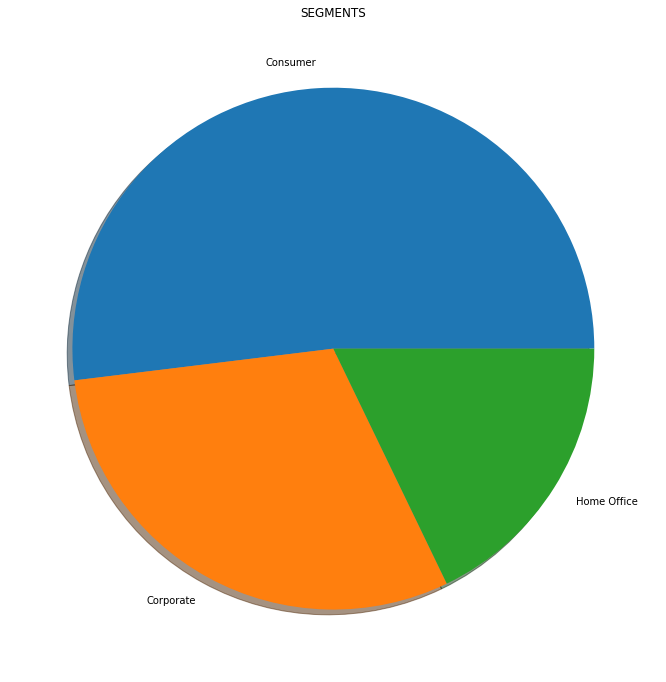

In [14]:
labels=[X[0] for X in counts_seg.keys()]
bar ,ax = plt.subplots(figsize=(20,12))
ax=plt.pie(x=counts_seg,labels=labels,shadow=True)
plt.title("SEGMENTS")
plt.show()

### This Plot shows the proportion in the segment feature.We can See that the consumer segment is much higher than the others

In [16]:
temp1=pd.DataFrame({"Ship Mode": df["Ship Mode"]})
counts_ship=temp1.value_counts()
counts_ship

Ship Mode     
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
dtype: int64

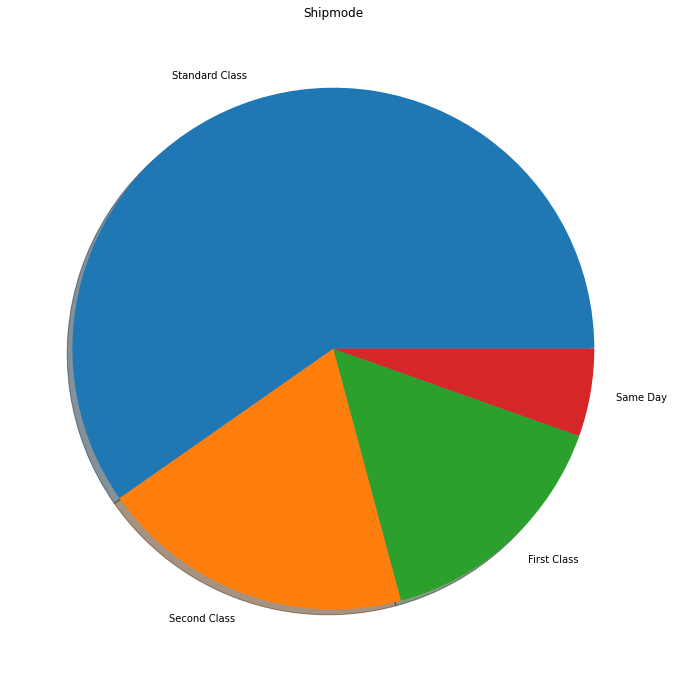

In [18]:
labels1=[X[0] for X in counts_ship.keys()]
bar ,ax = plt.subplots(figsize=(20,12))
ax=plt.pie(x=counts_ship,labels=labels1,shadow=True)
plt.title("Shipmode")
plt.show()

### This plot shows that in the shipmode feature the proportion of standard class is highest.

In [19]:
temp2=pd.DataFrame({"category": df["Category"]})
counts_category=temp2.value_counts()
counts_category

category       
Office Supplies    6026
Furniture          2121
Technology         1847
dtype: int64

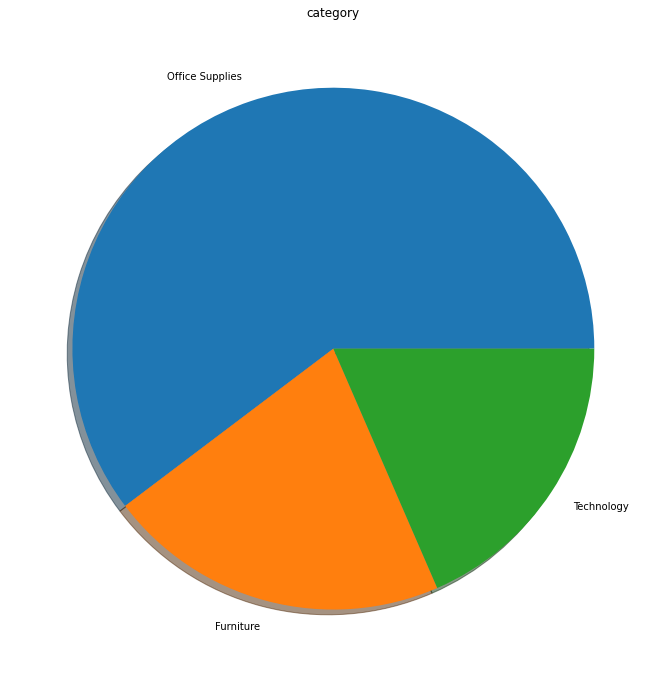

In [20]:
labels2=[X[0] for X in counts_category.keys()]
bar ,ax = plt.subplots(figsize=(20,12))
ax=plt.pie(x=counts_category,labels=labels2,shadow=True)
plt.title("category")
plt.show()

### This plot shows that in the store office supply type of things has high proportion rate is high

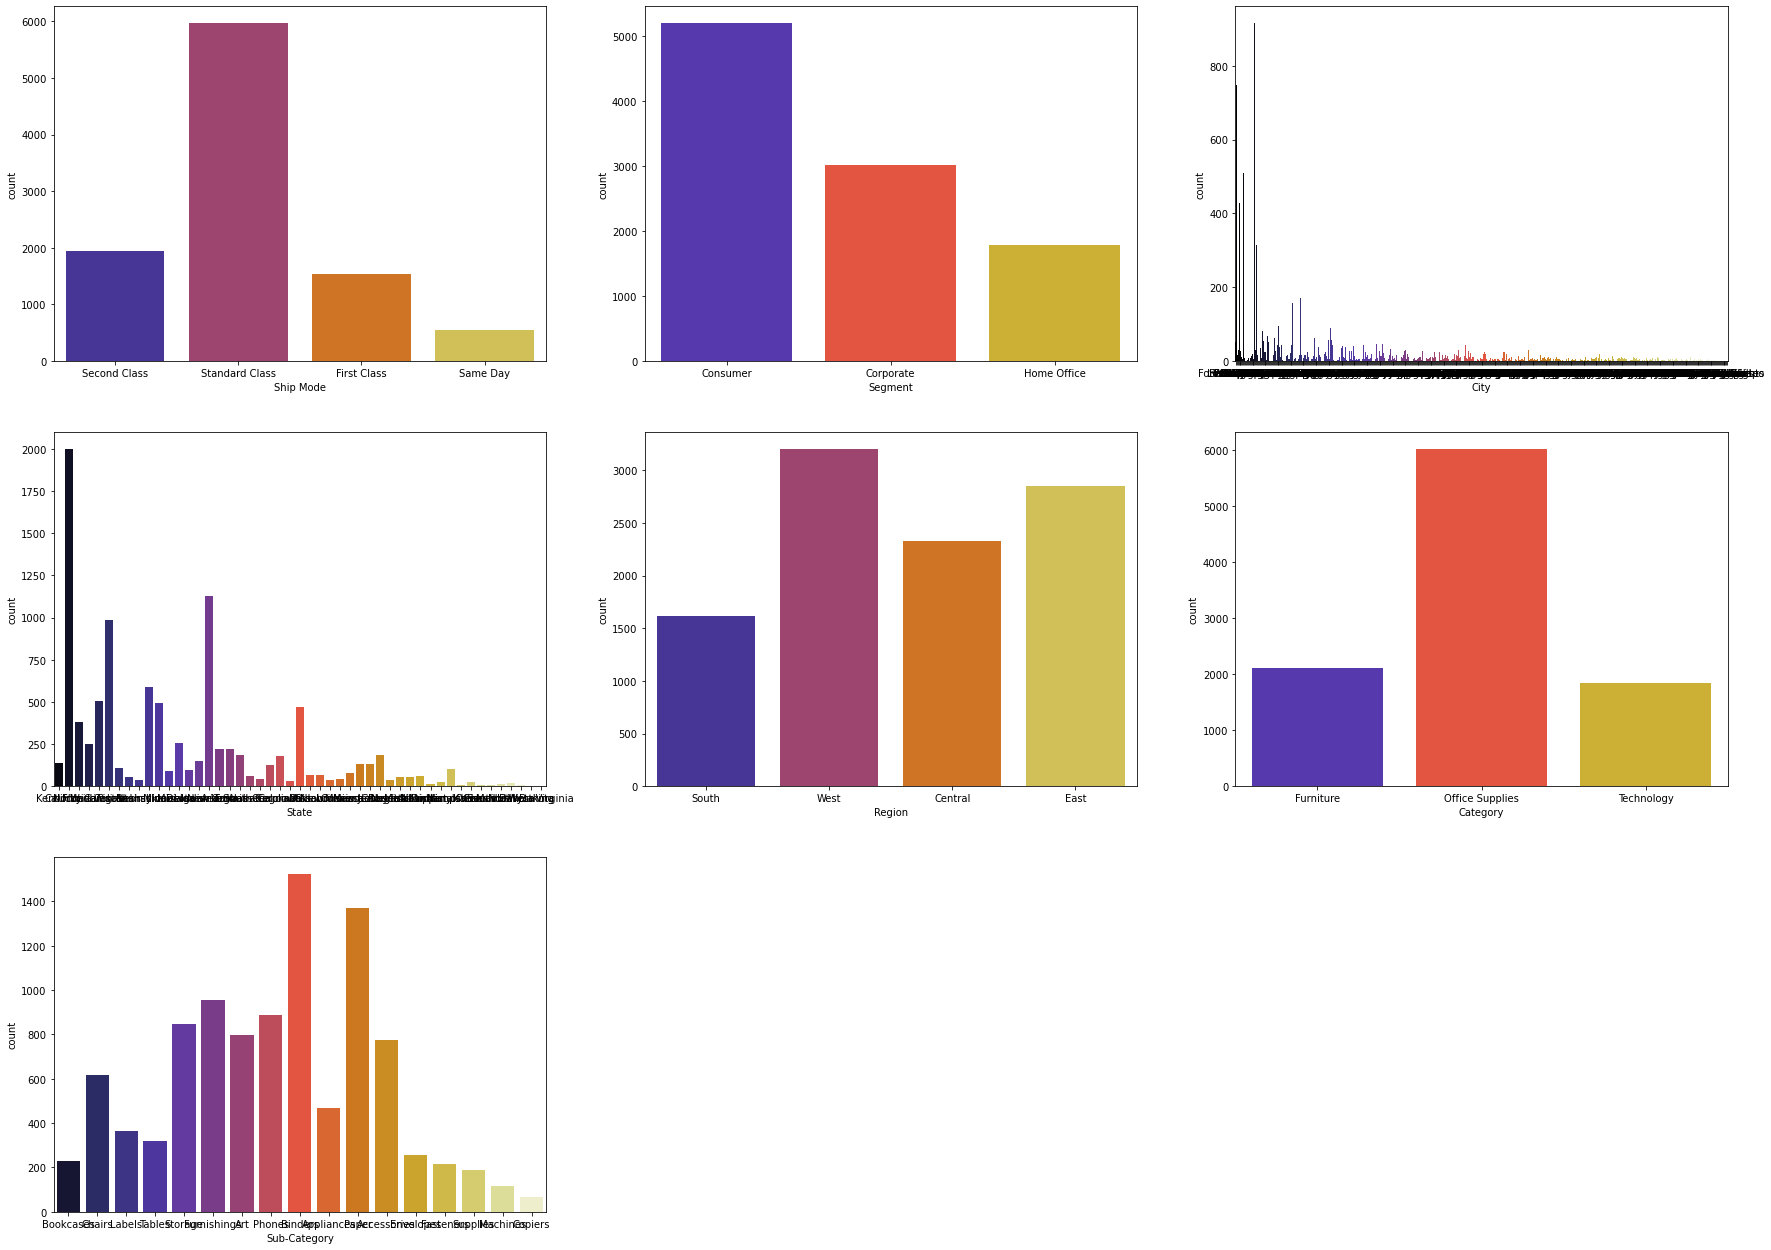

In [43]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(new_col, 1):
    plt.subplot(4,3 , i)
    sb.countplot(x=column,data=df,palette="CMRmap")
    plt.xlabel(column)
   

### These plots shows the proportional distributions of every categorical features

## Extracting The numerical features from the dataset

In [3]:
numerical_val = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_val))


Number of numerical variables:  5


In [4]:
df_num=df[numerical_val]
df_num.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


## Creating Some plots w.r.t Numerical Features

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

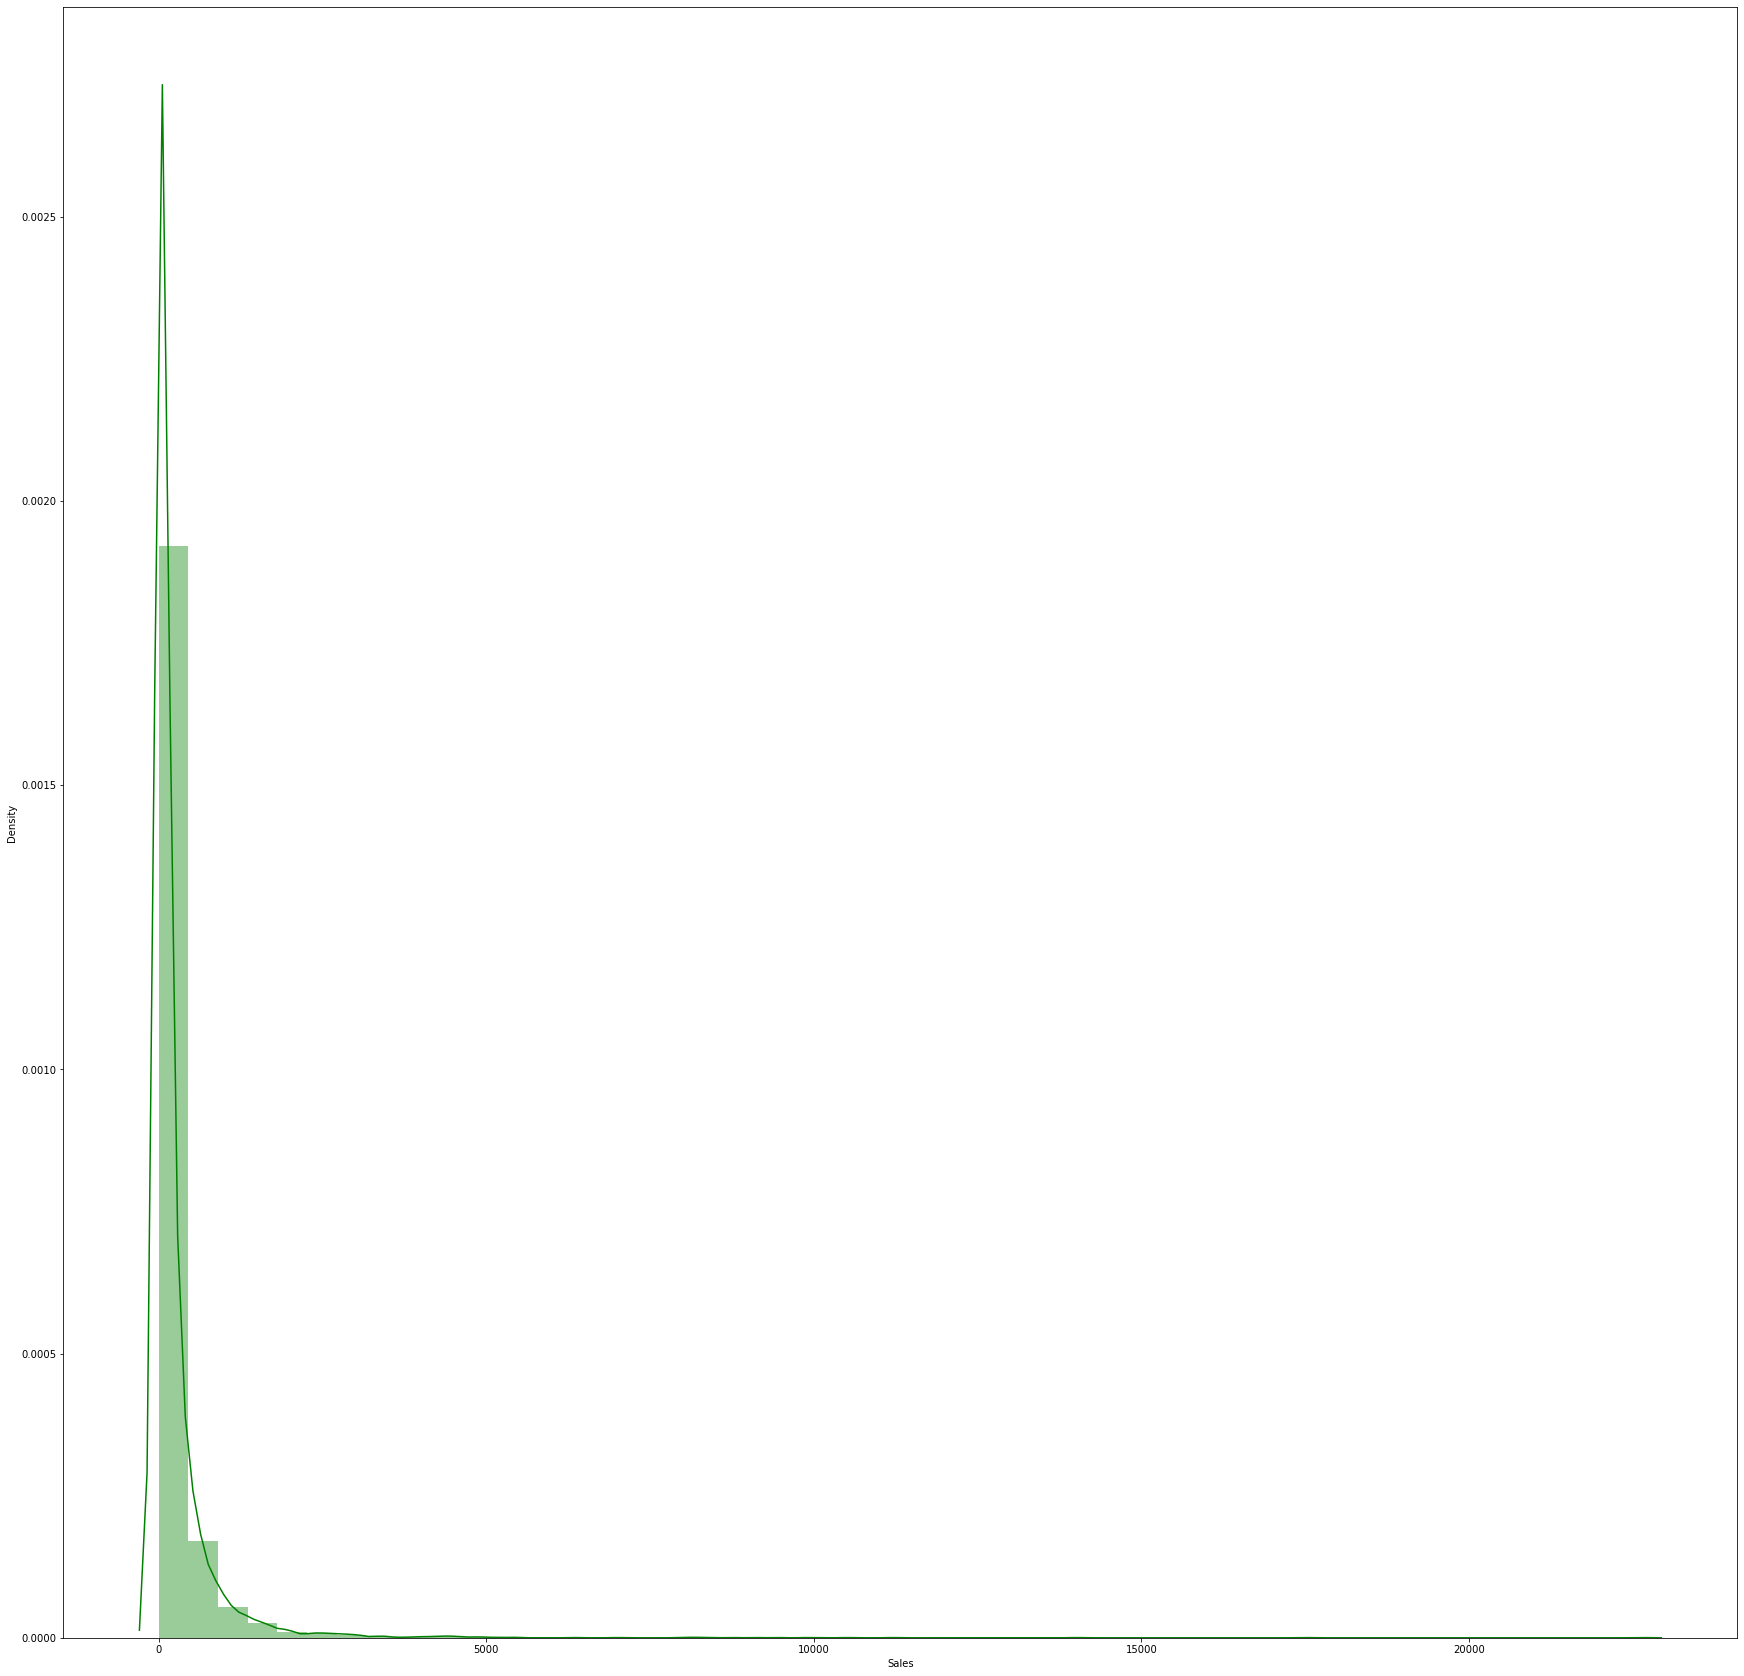

In [5]:
plt.figure(figsize=(30, 30))
sb.distplot(df_num["Sales"],color="green",hist=True) 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

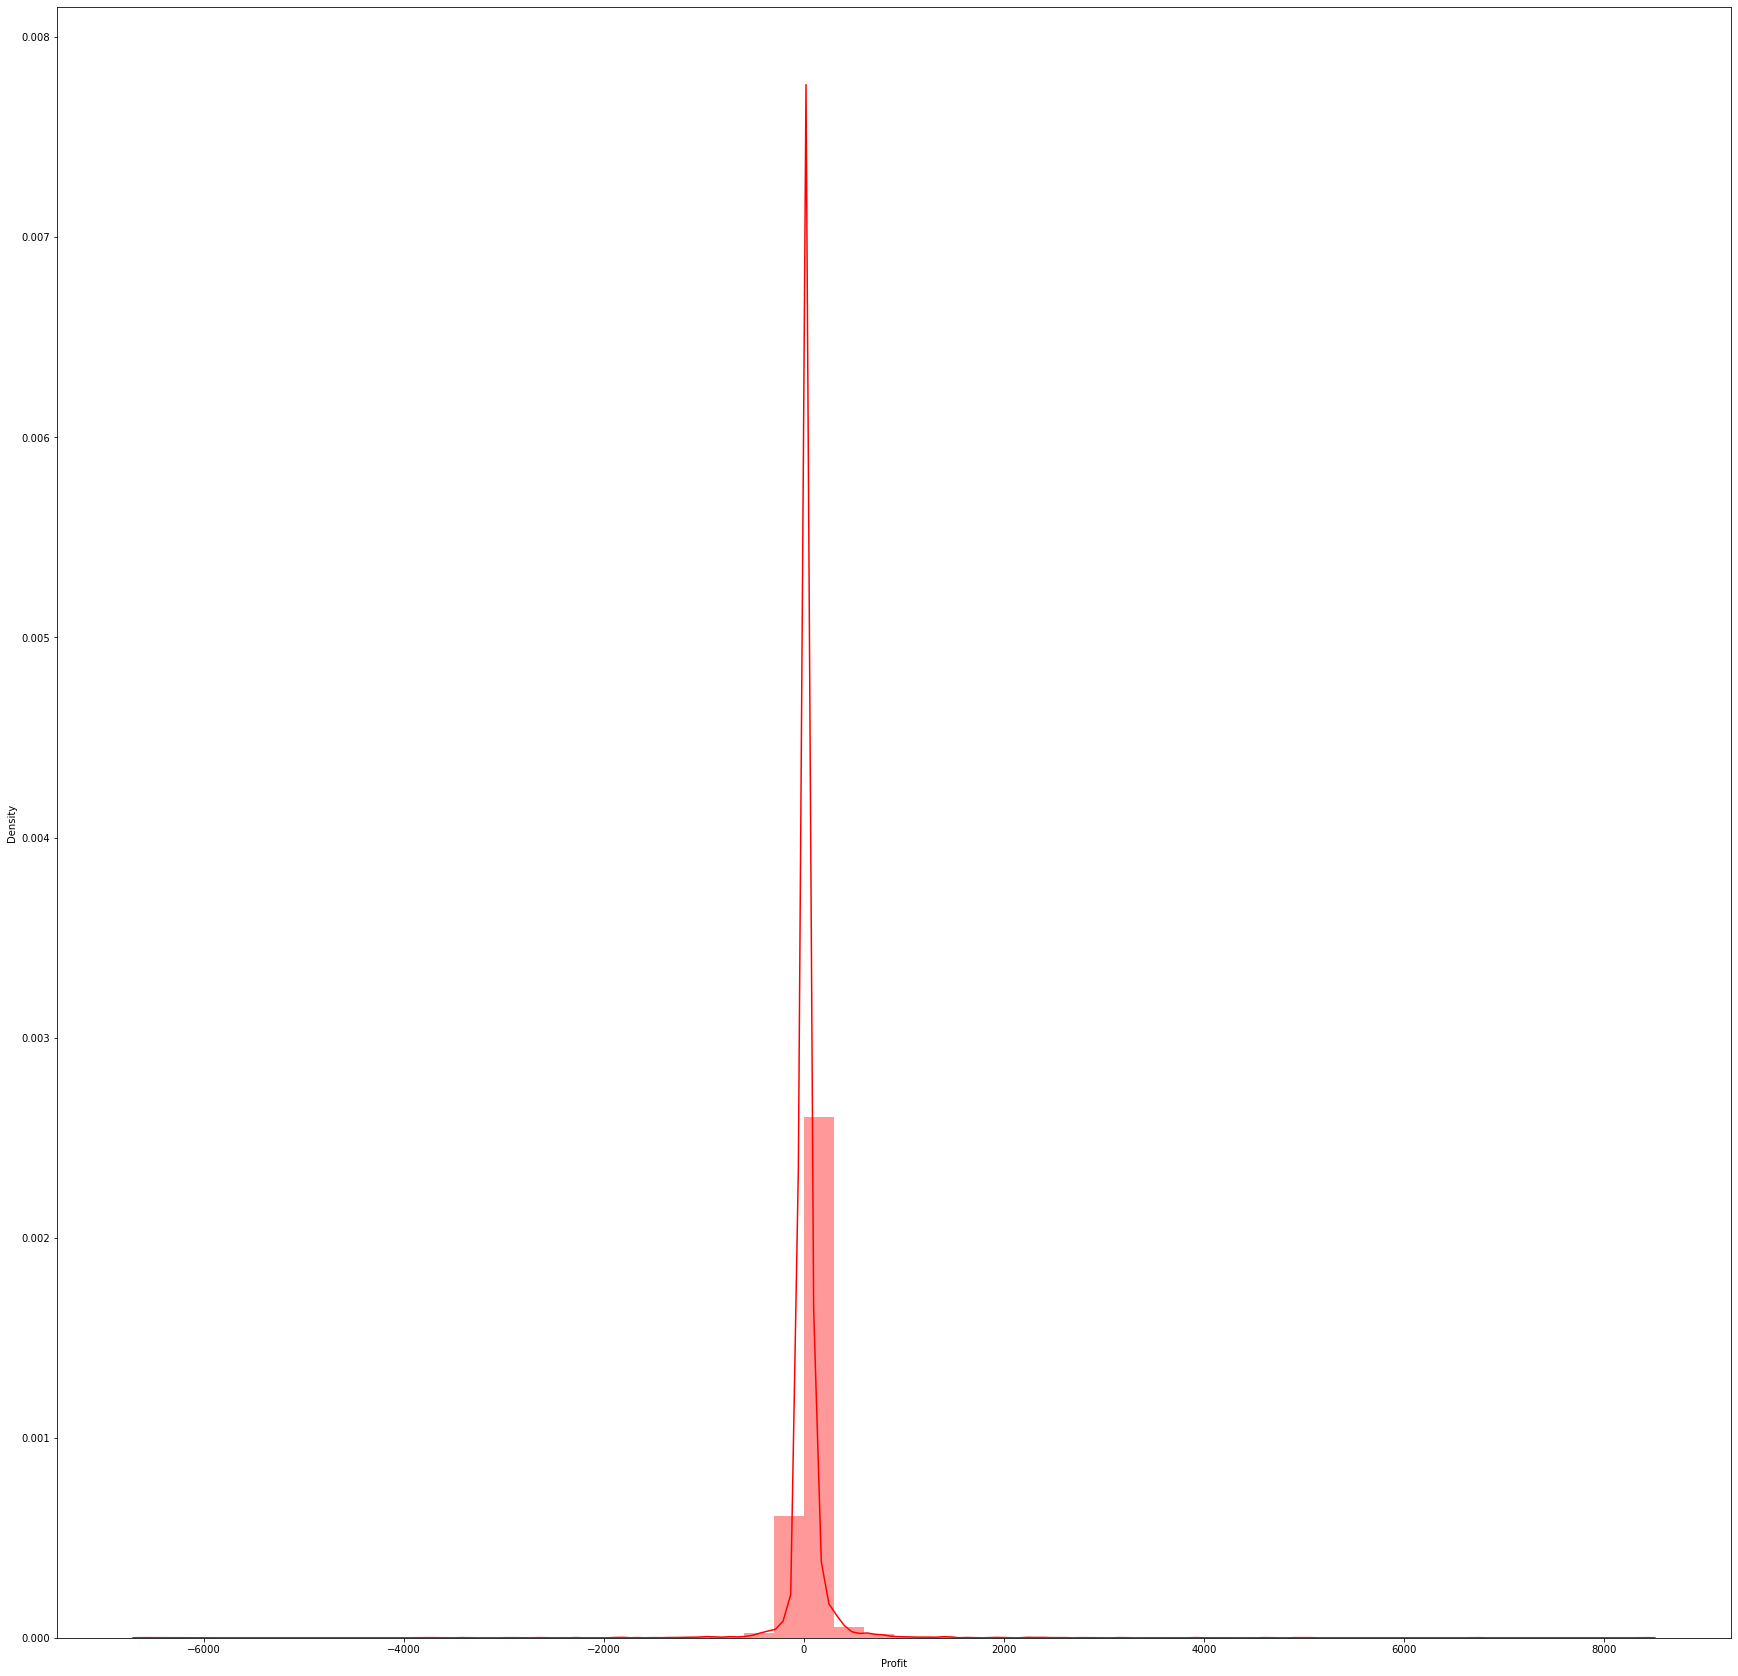

In [34]:
plt.figure(figsize=(30, 30))
sb.distplot(df_num["Profit"],color="red",hist=True)

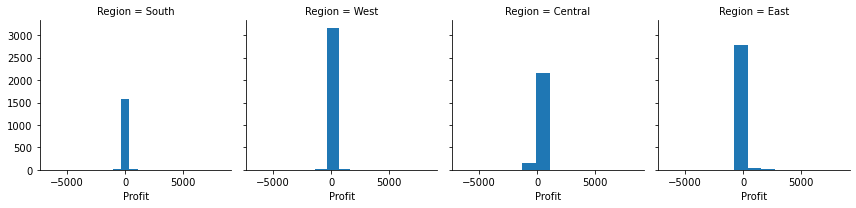

In [6]:
sb.FacetGrid(df,col="Region",col_wrap=4).map(plt.hist,"Profit")

### From this we plots we can see that the region wise distribution of profits
### We can see the profit is high in east and west region

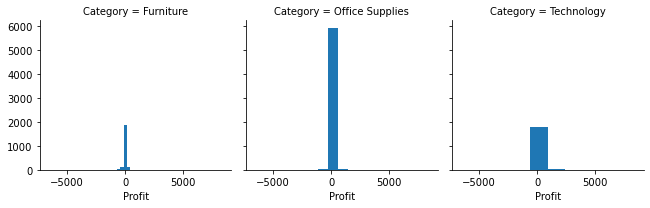

In [37]:
sb.FacetGrid(df,col="Category",col_wrap=4).map(plt.hist,"Profit")

### We can clearly see that profit for office supplies are high

## Relation Between Sales and Profit
### This plot shows how profit varries with respect to the sales

Text(0, 0.5, 'Profit')

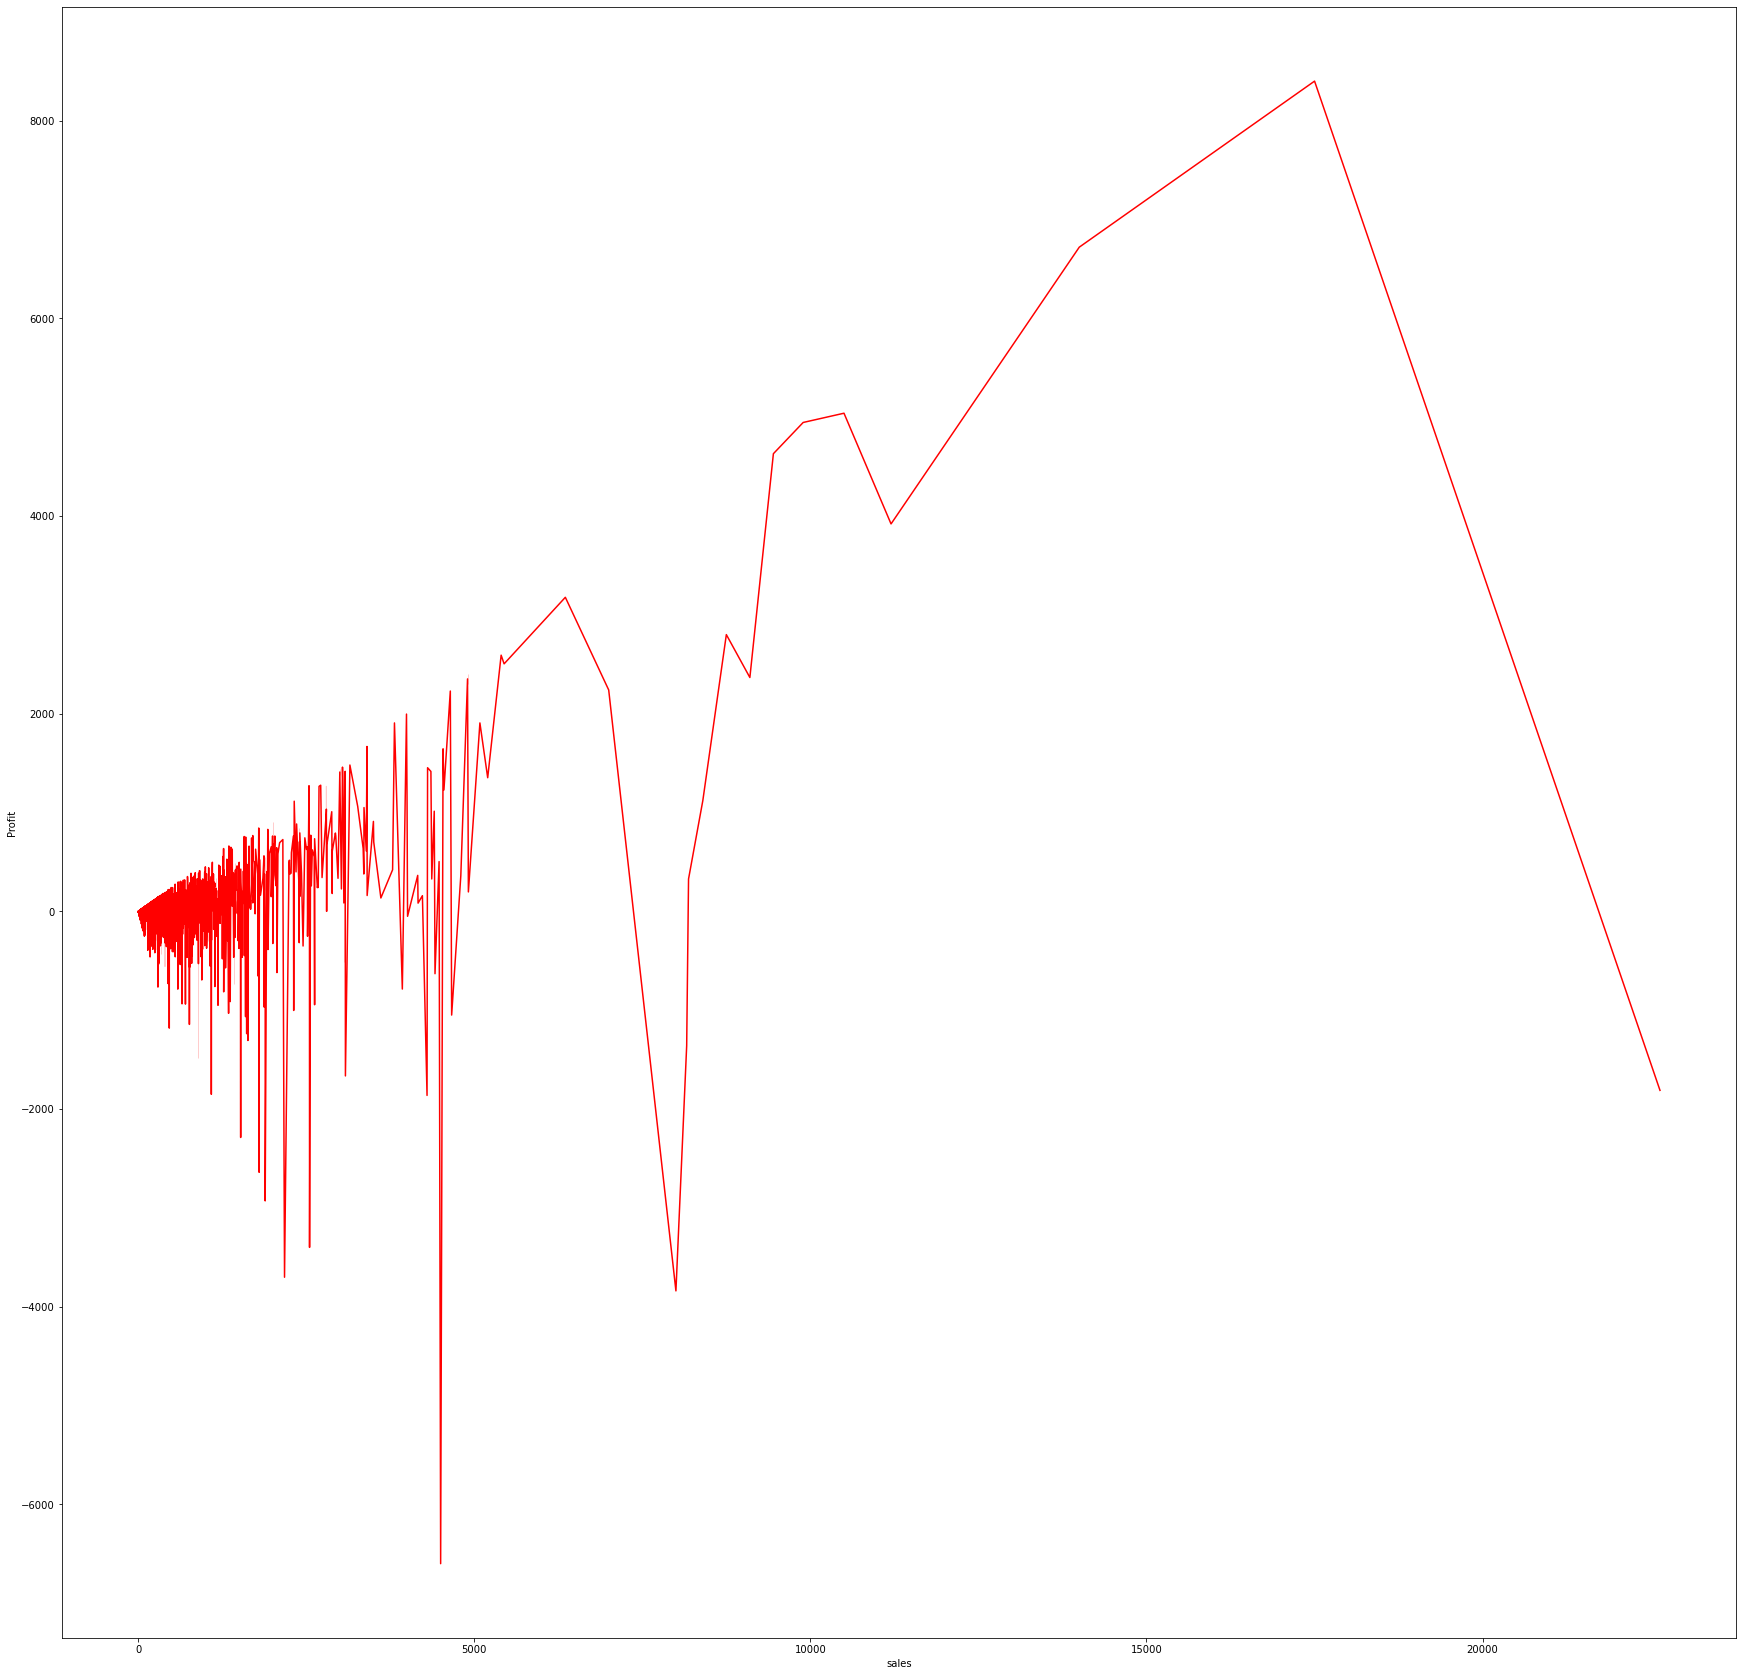

In [27]:
plt.figure(figsize=(30, 30))
sb.lineplot(x="Sales",y="Profit",data=df,color="red")
plt.xlabel("sales")
plt.ylabel("Profit")

## Relation Between Discount  and  Sales
### This plot shows how sales varries with respect to the discount.

Text(0, 0.5, 'sales')

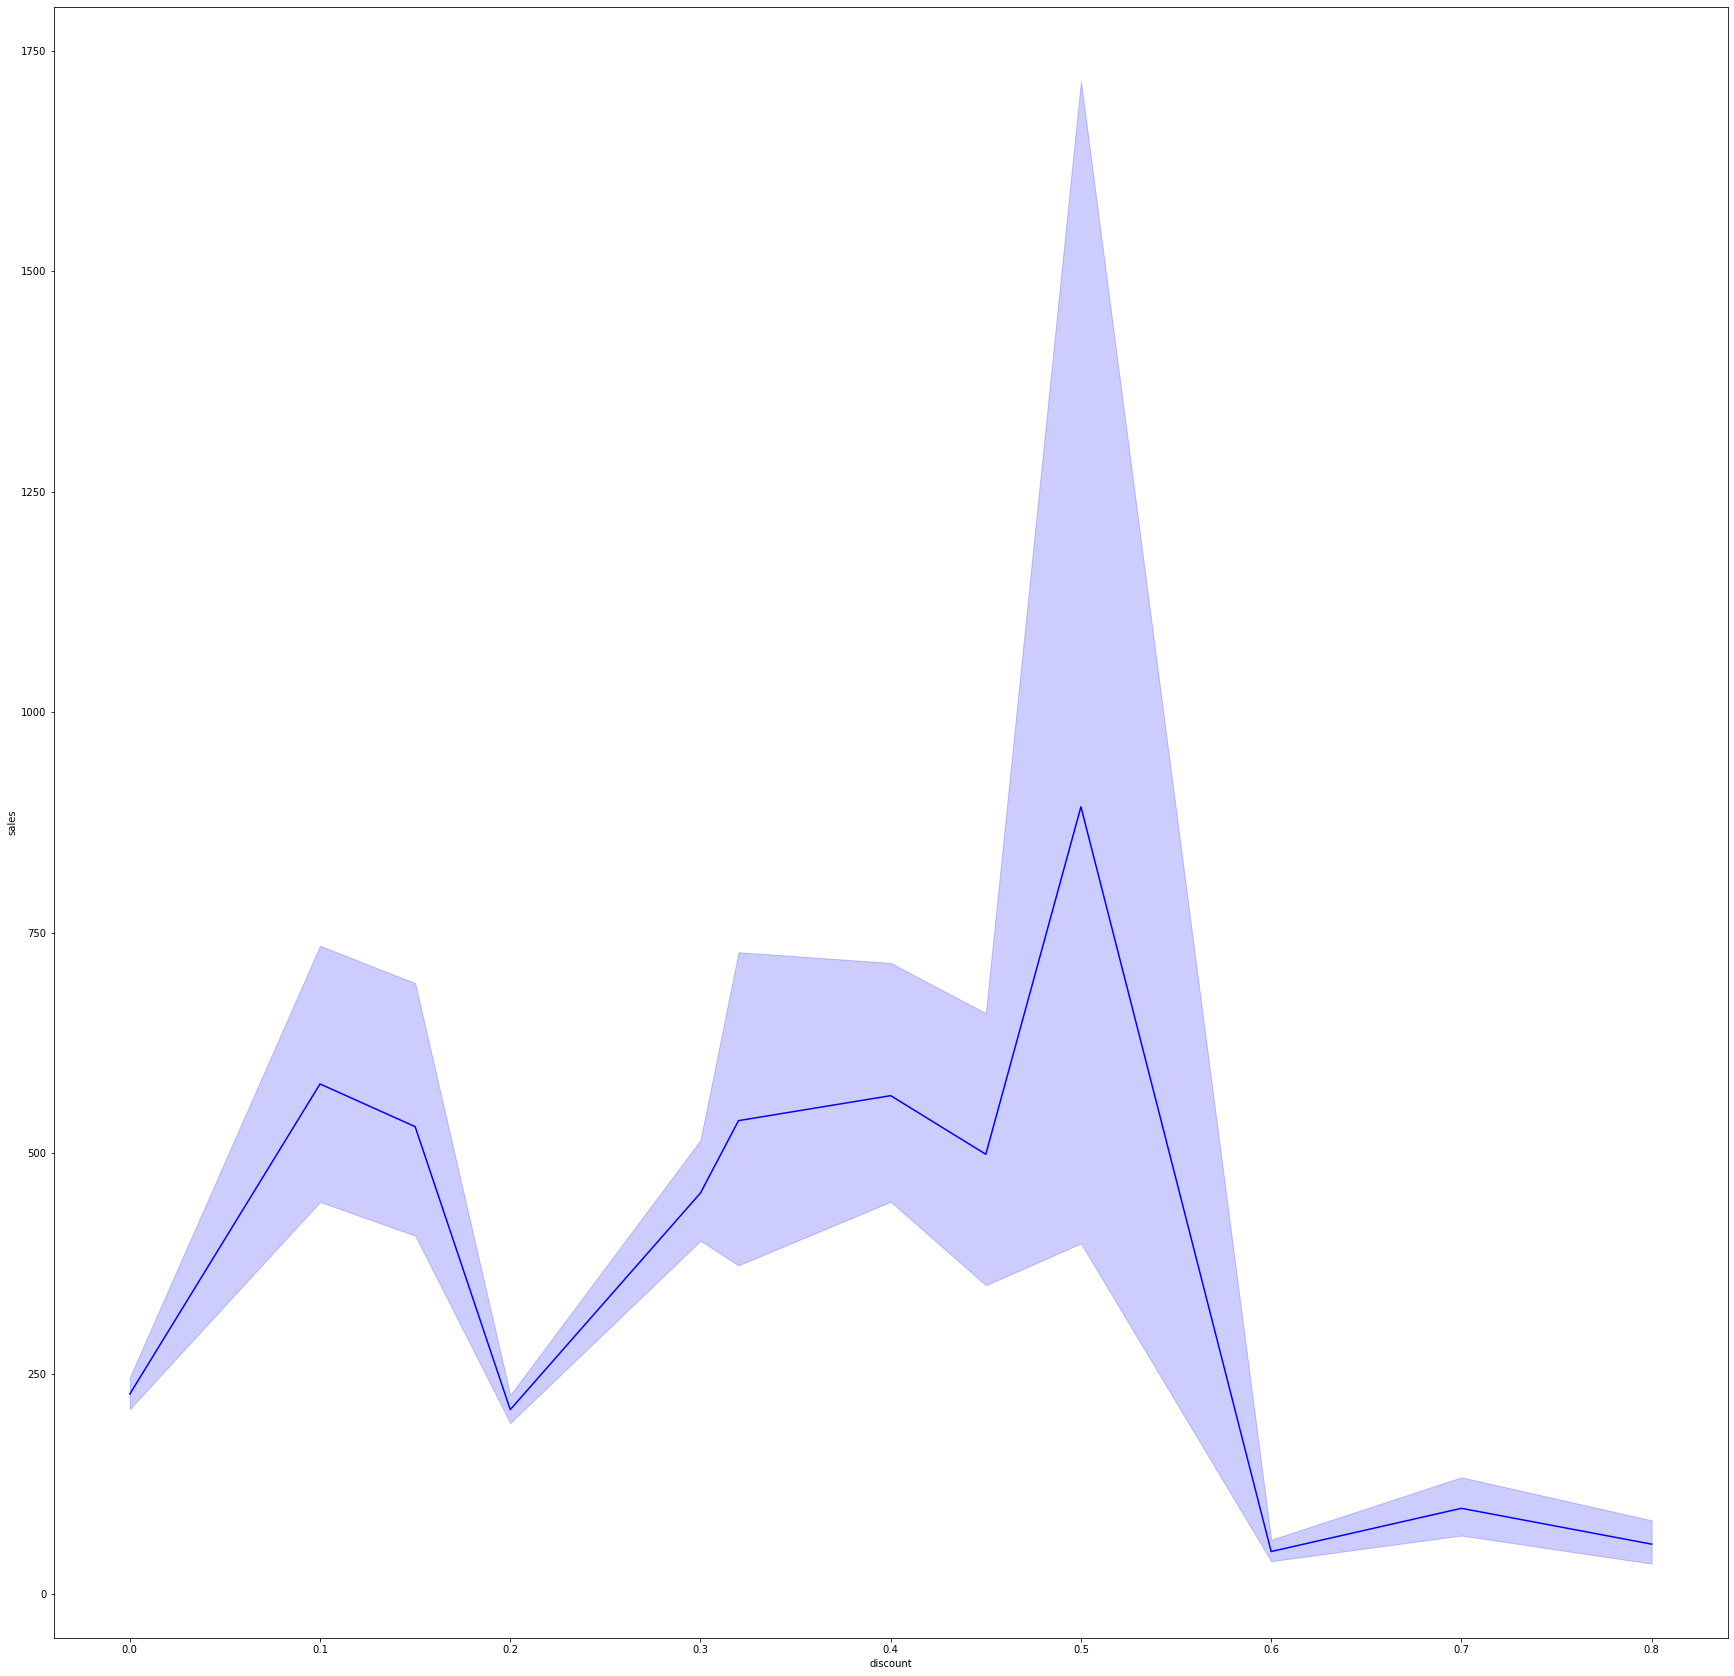

In [38]:
plt.figure(figsize=(30, 30))
sb.lineplot(x="Discount",y="Sales",data=df,color="blue")
plt.xlabel("discount")
plt.ylabel("sales")

## Relation Between Discount and Profit
### This plot shows how profit varries with respect to the discount

Text(0, 0.5, 'profit')

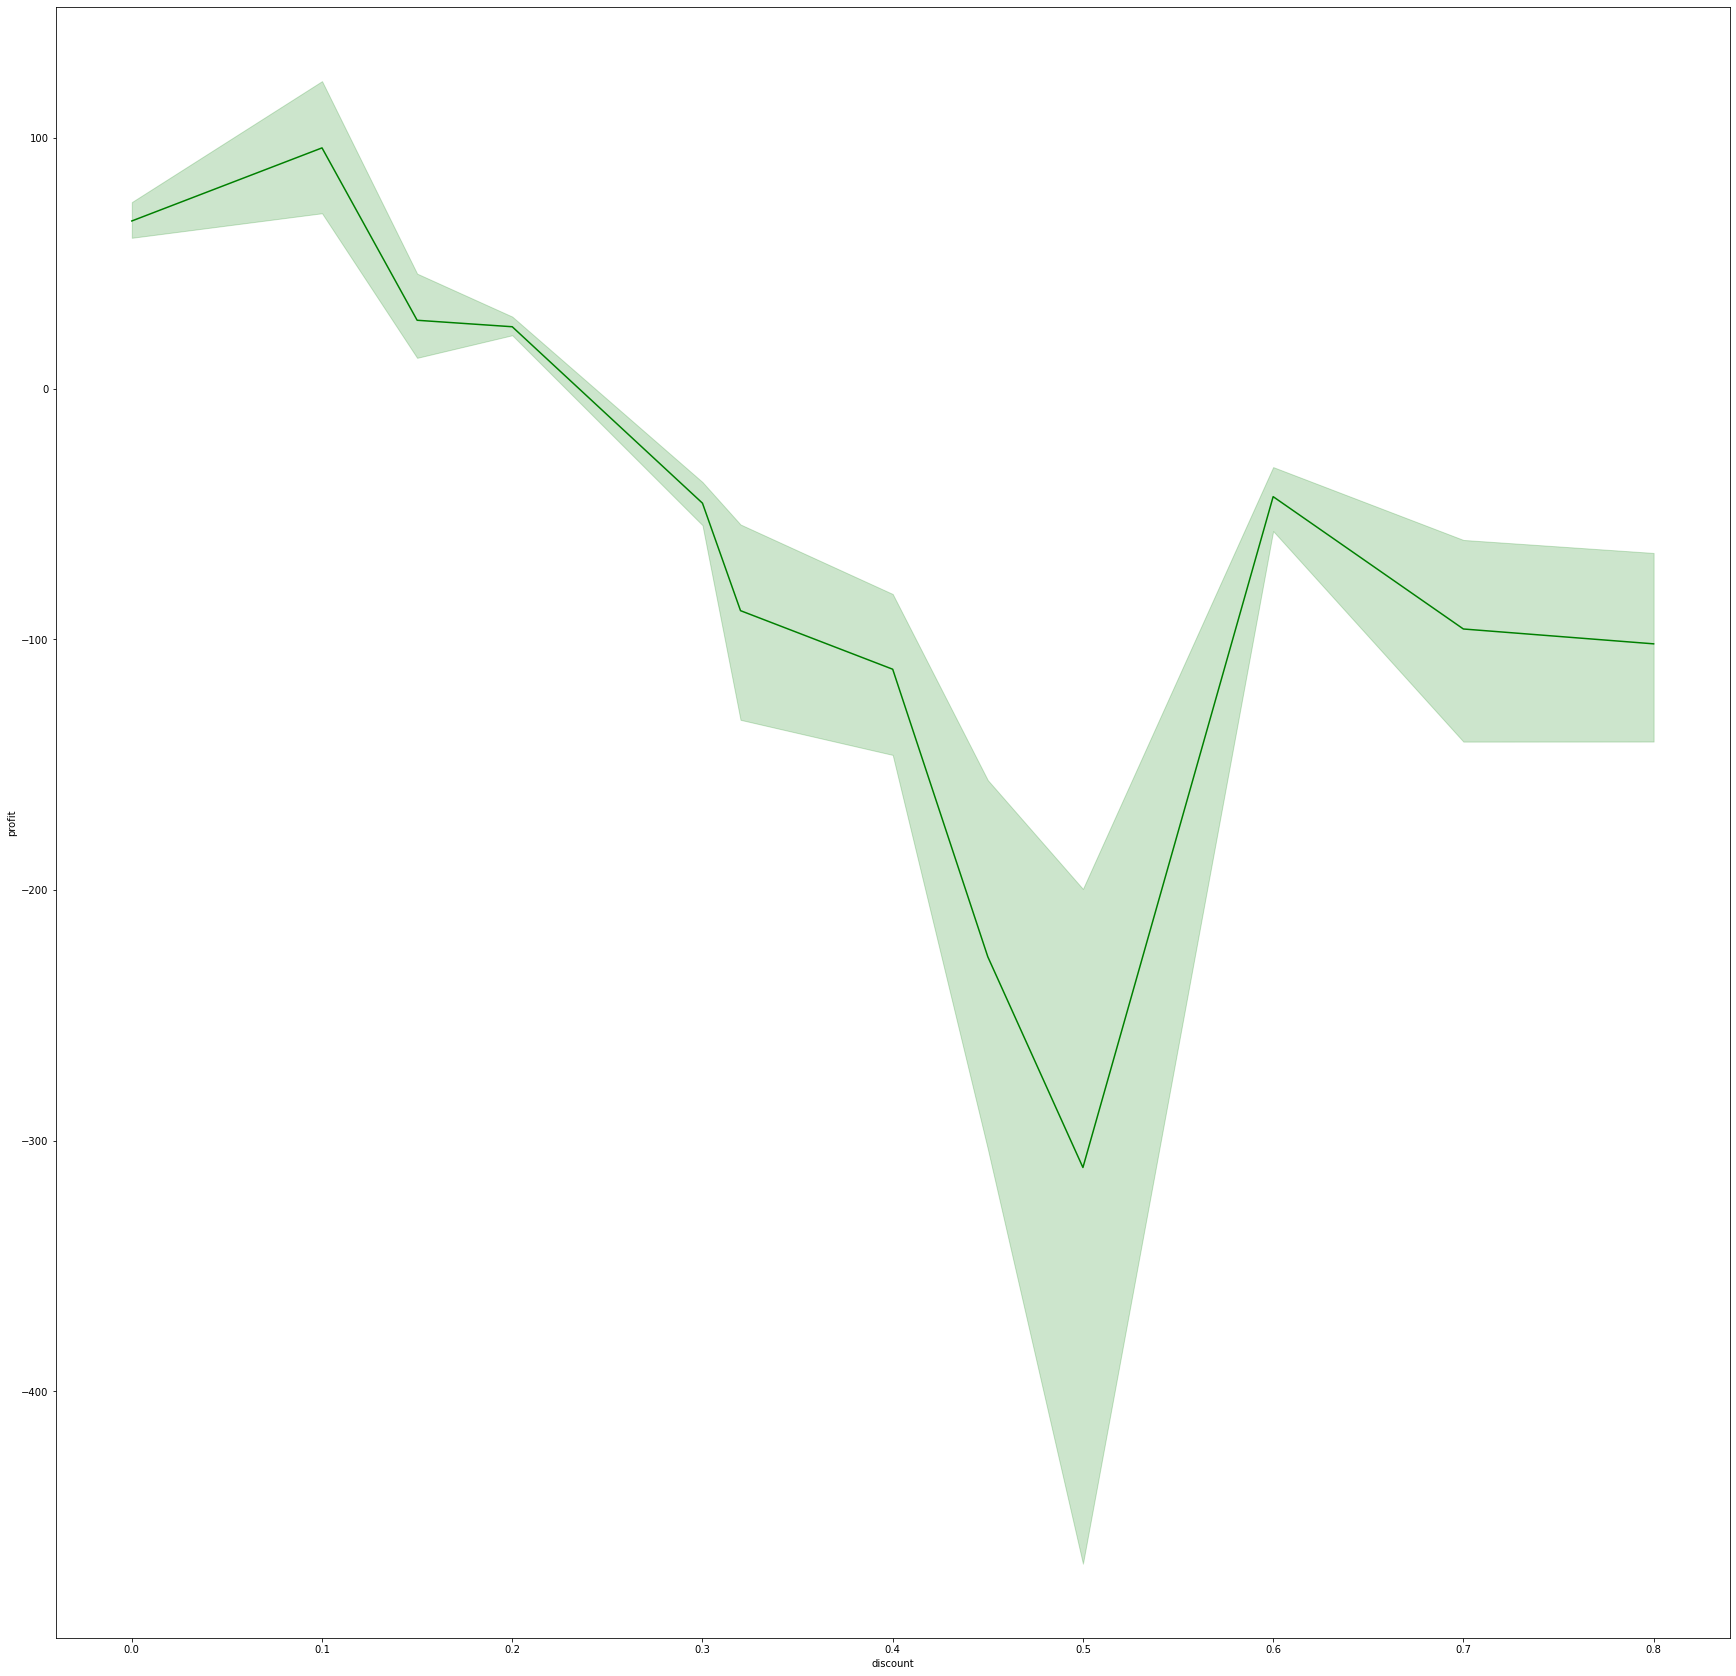

In [44]:
plt.figure(figsize=(30, 30))
sb.lineplot(x="Discount",y="Profit",data=df,color="green")
plt.xlabel("discount")
plt.ylabel("profit")

## Some plots to describe the relationship between various features

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

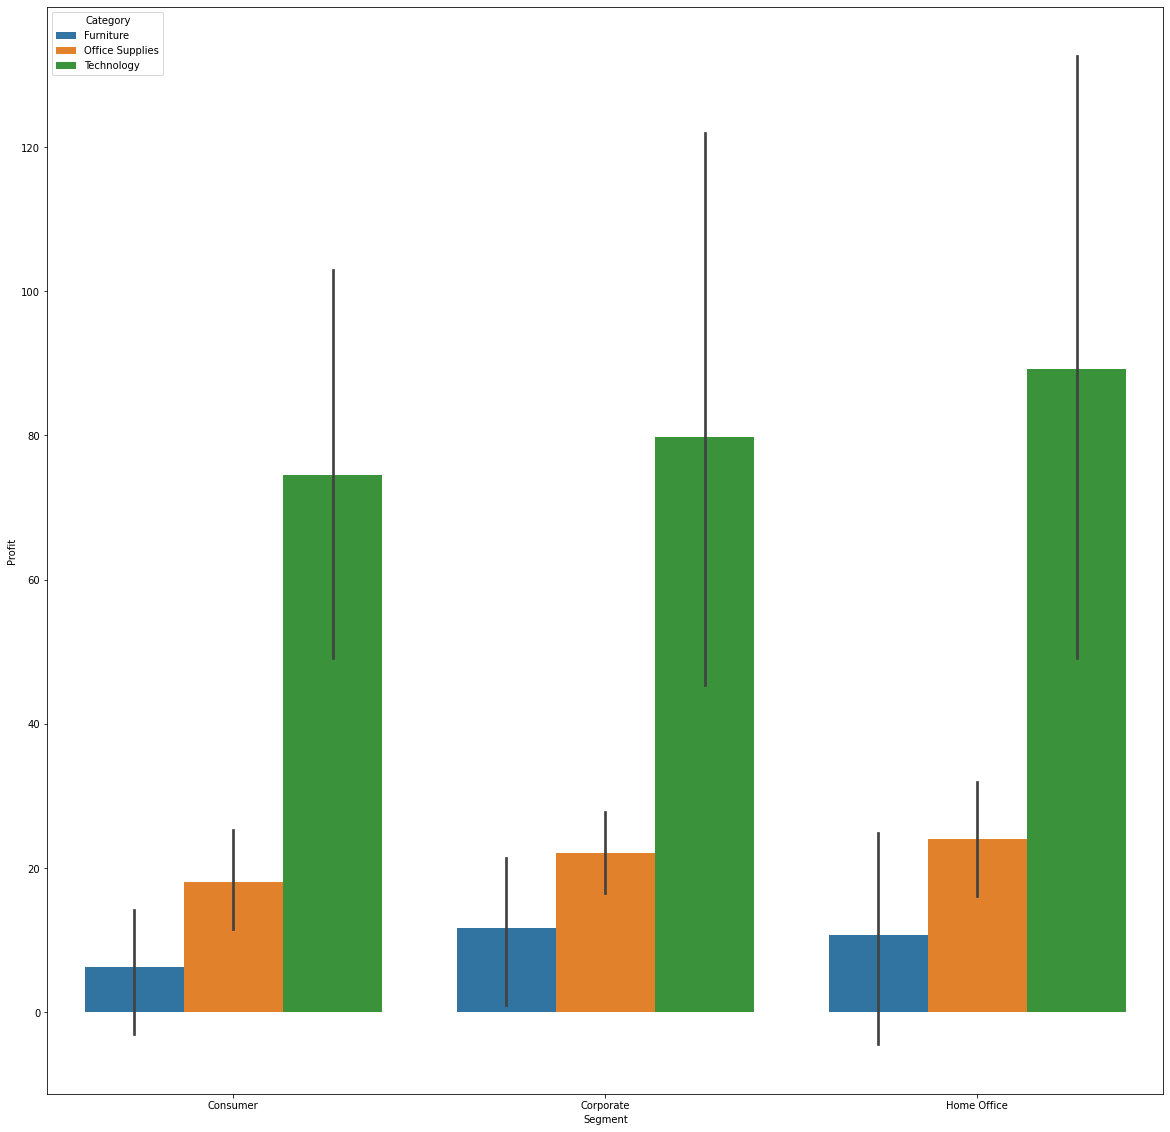

In [29]:
plt.figure(figsize=(20, 20))
sb.barplot(x="Segment",y="Profit",data=df,hue="Category",orient="v")


<AxesSubplot:xlabel='Region', ylabel='Profit'>

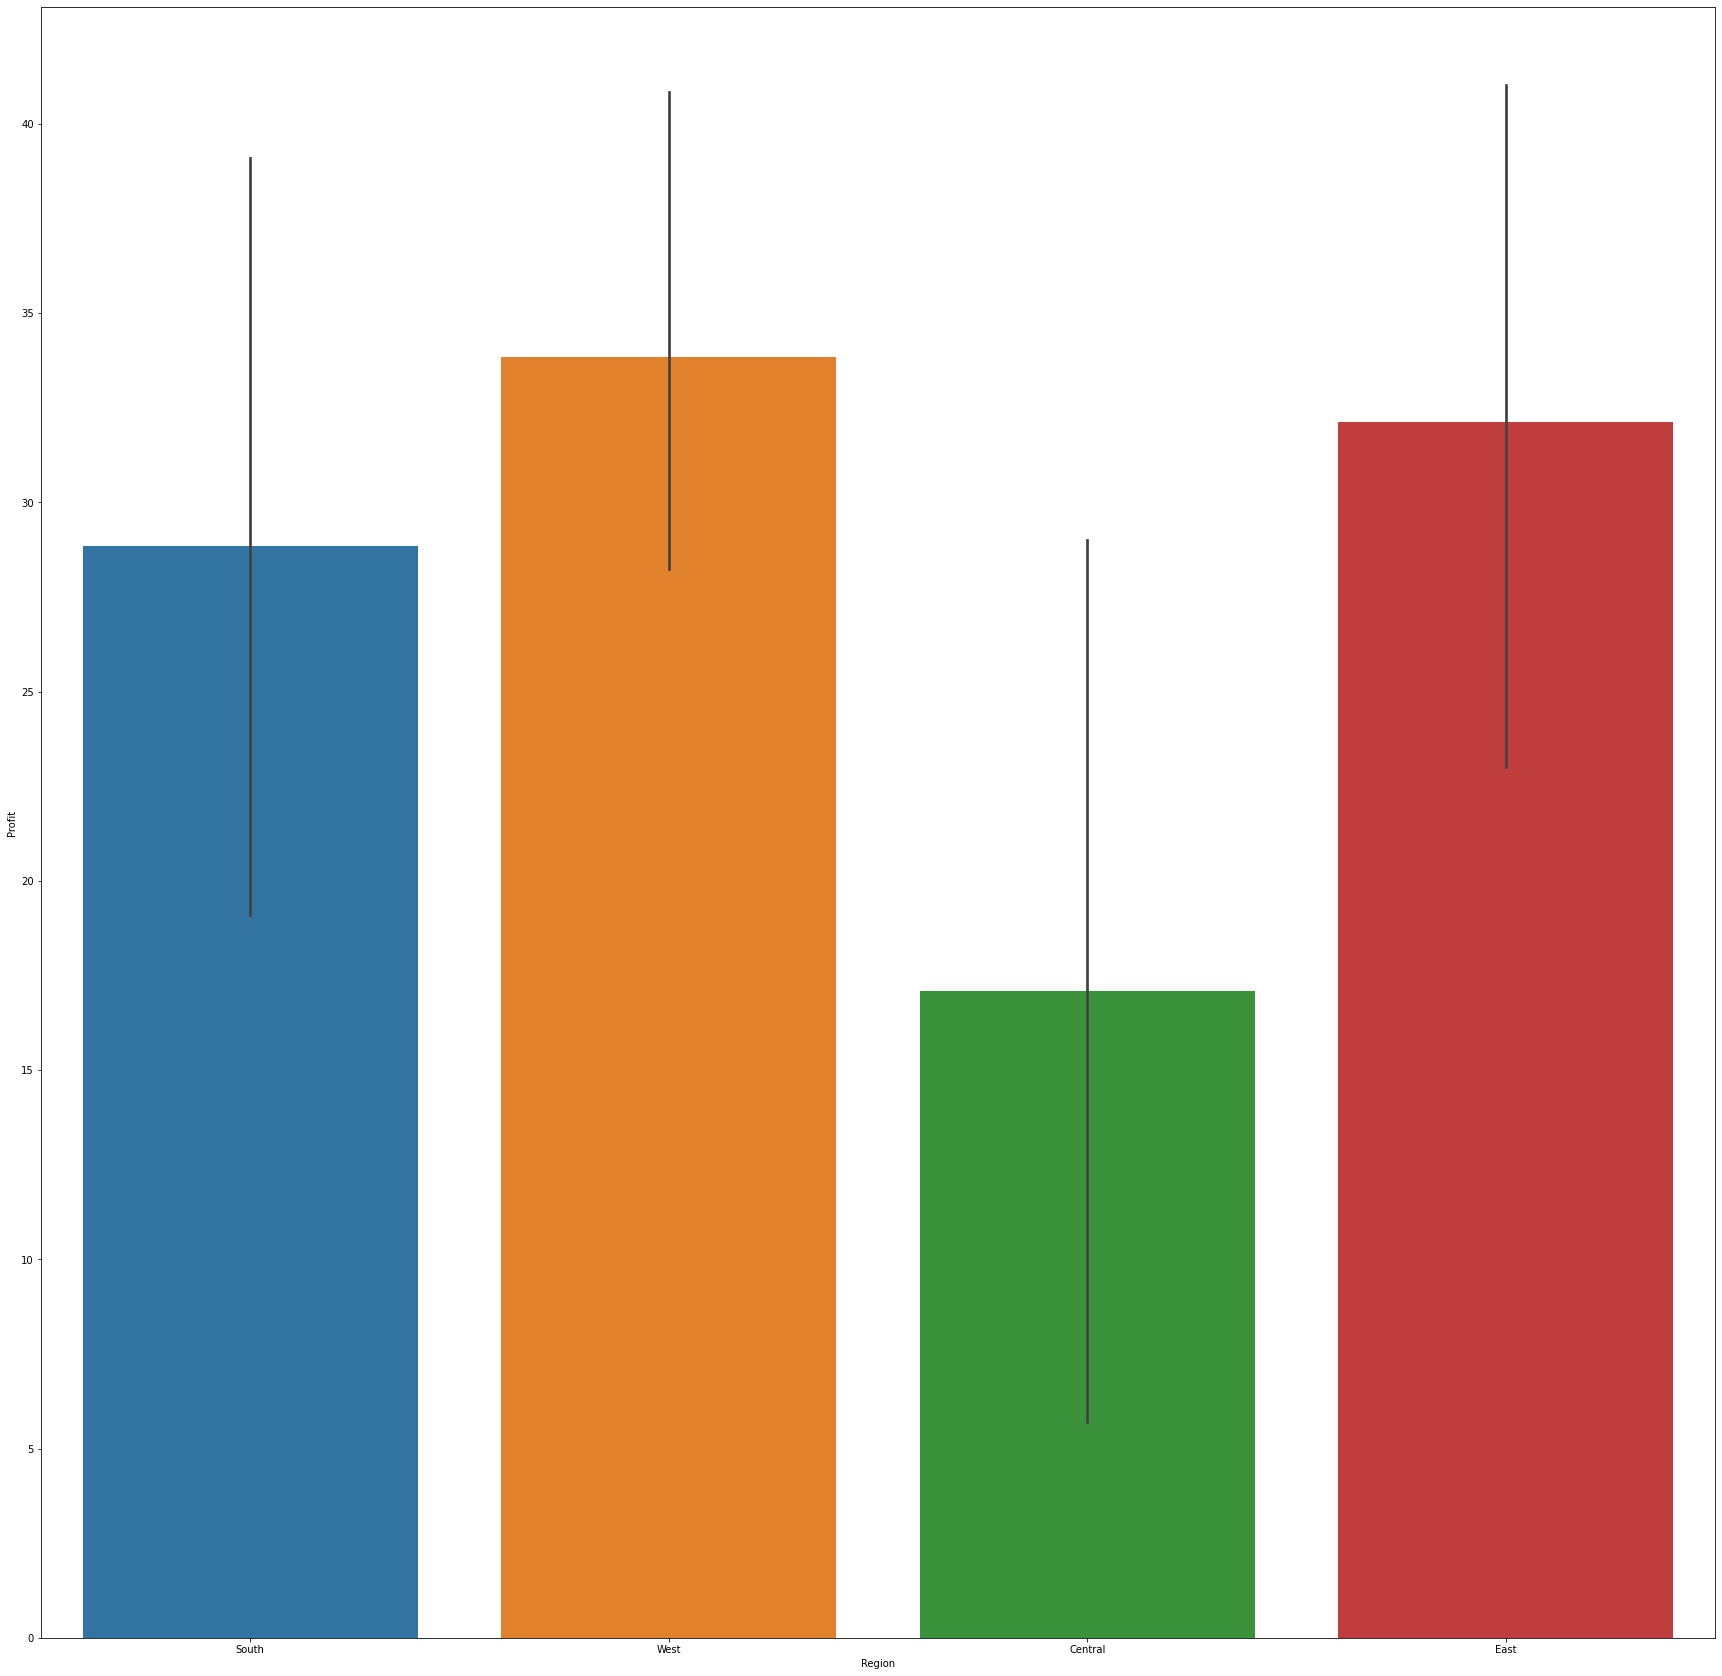

In [30]:
plt.figure(figsize=(30, 30))
sb.barplot(x="Region",y="Profit",data=df,orient="v")

<AxesSubplot:xlabel='Region', ylabel='Profit'>

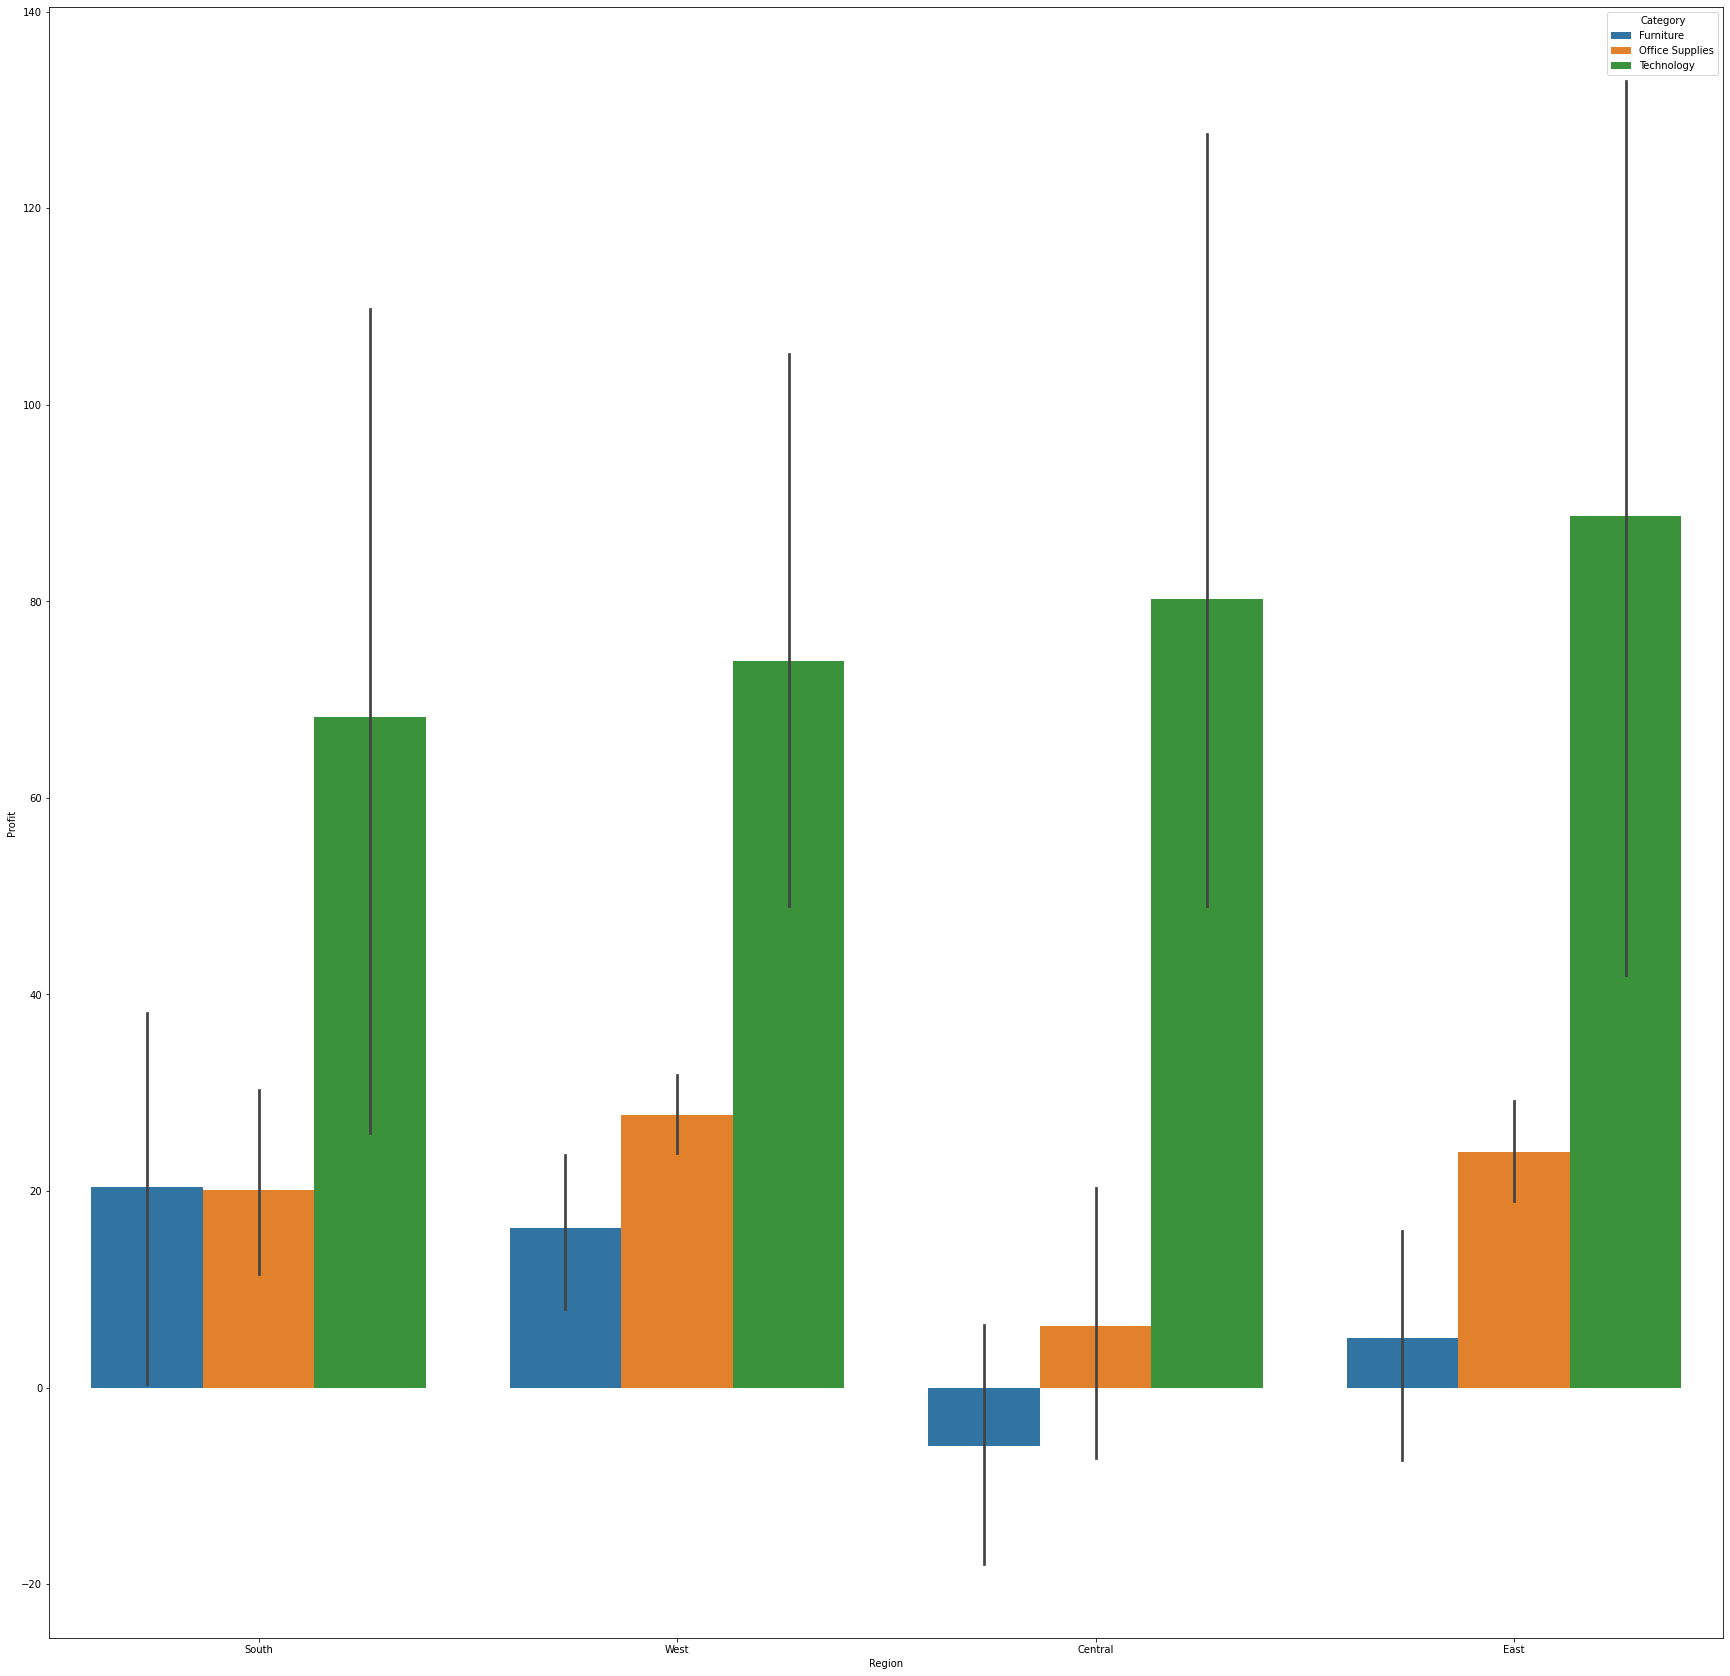

In [31]:
plt.figure(figsize=(30, 30))
sb.barplot(x="Region",y="Profit",data=df,hue="Category",orient="v")

<AxesSubplot:xlabel='Region', ylabel='Sales'>

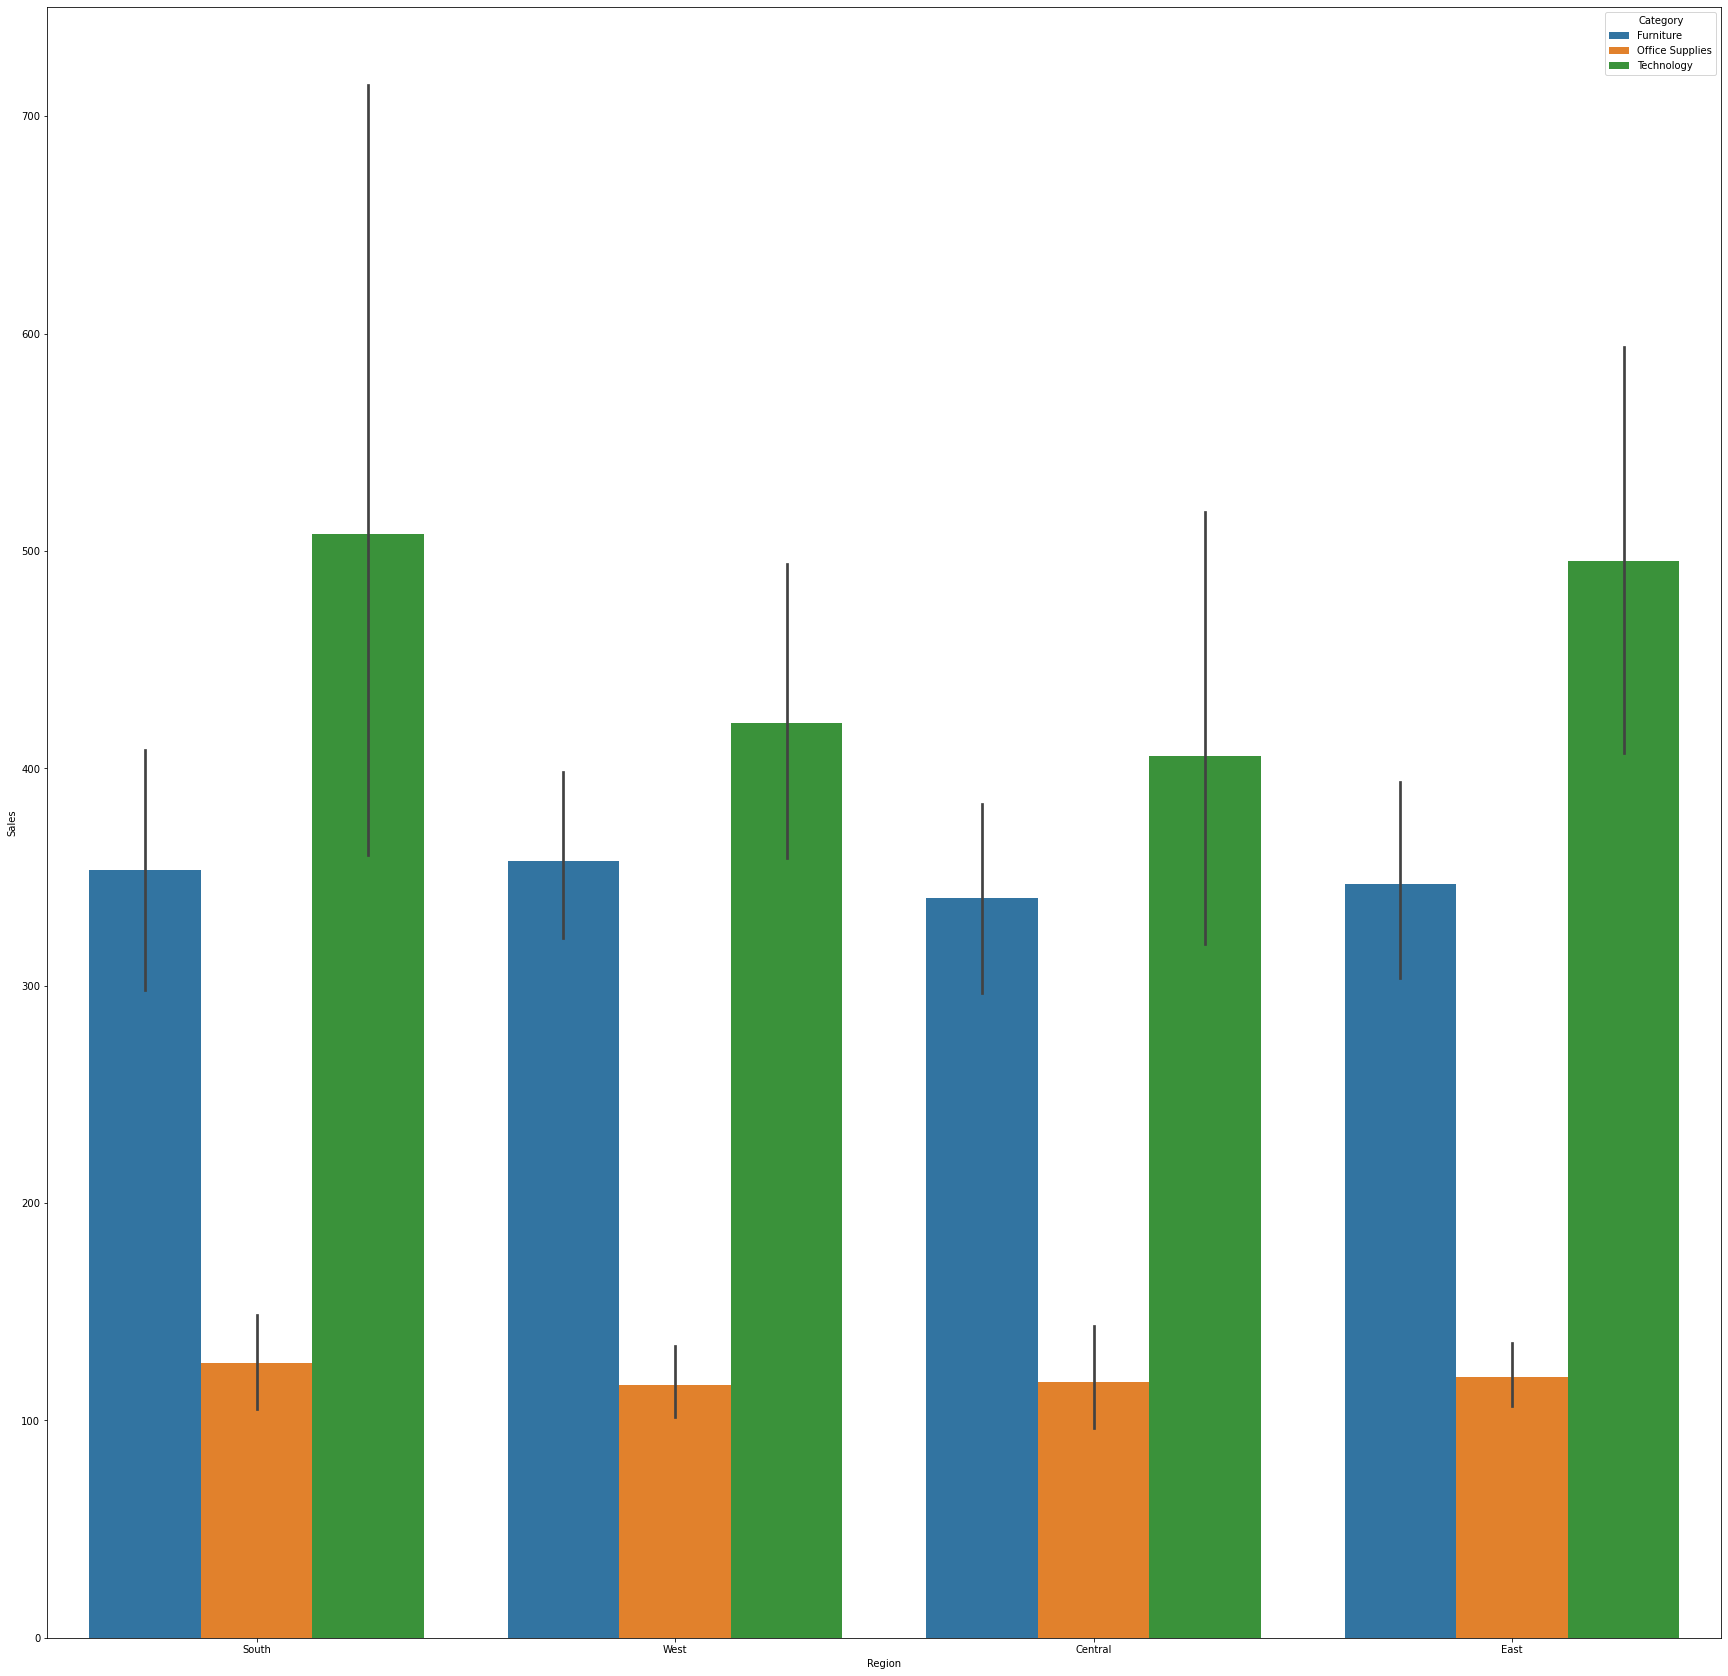

In [42]:
plt.figure(figsize=(30, 30))
sb.barplot(x="Region",y="Sales",data=df,hue="Category",orient="v")

<AxesSubplot:xlabel='Region', ylabel='Discount'>

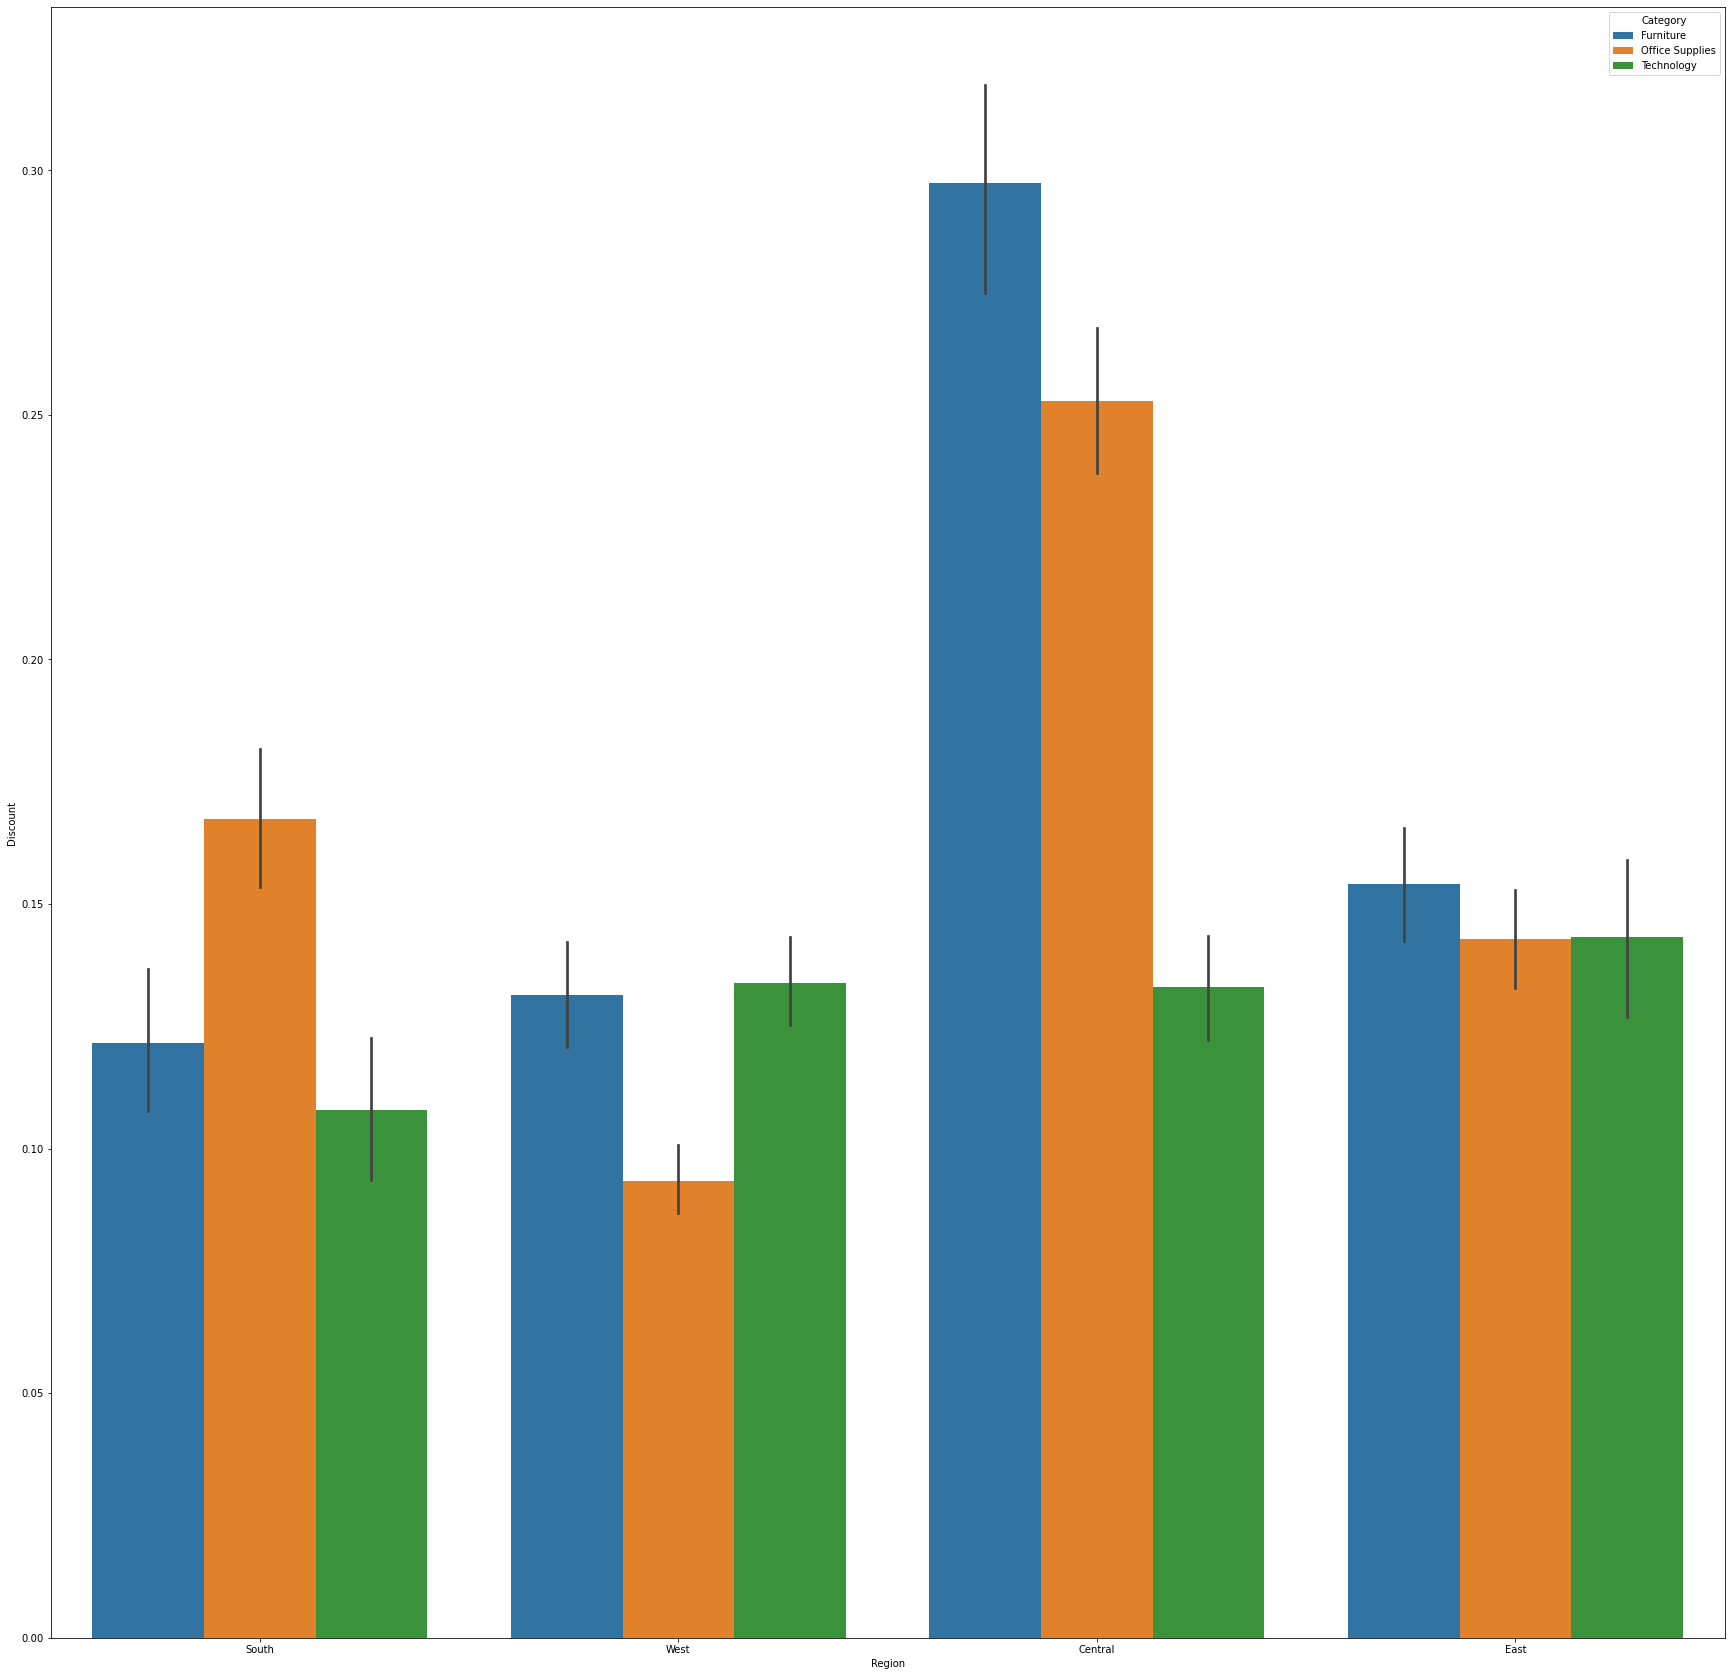

In [41]:
plt.figure(figsize=(30, 30))
sb.barplot(x="Region",y="Discount",data=df,hue="Category",orient="v")

<AxesSubplot:xlabel='Category', ylabel='Sales'>

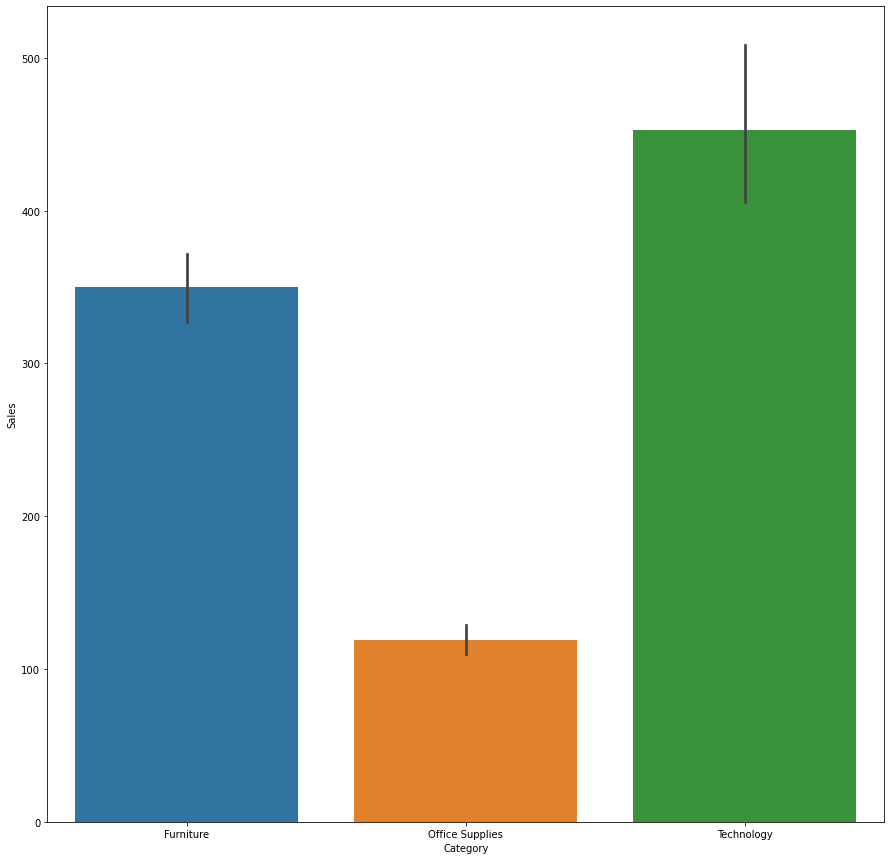

In [32]:
plt.figure(figsize=(15, 15))
sb.barplot(x="Category",y="Sales",data=df,orient="v")

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

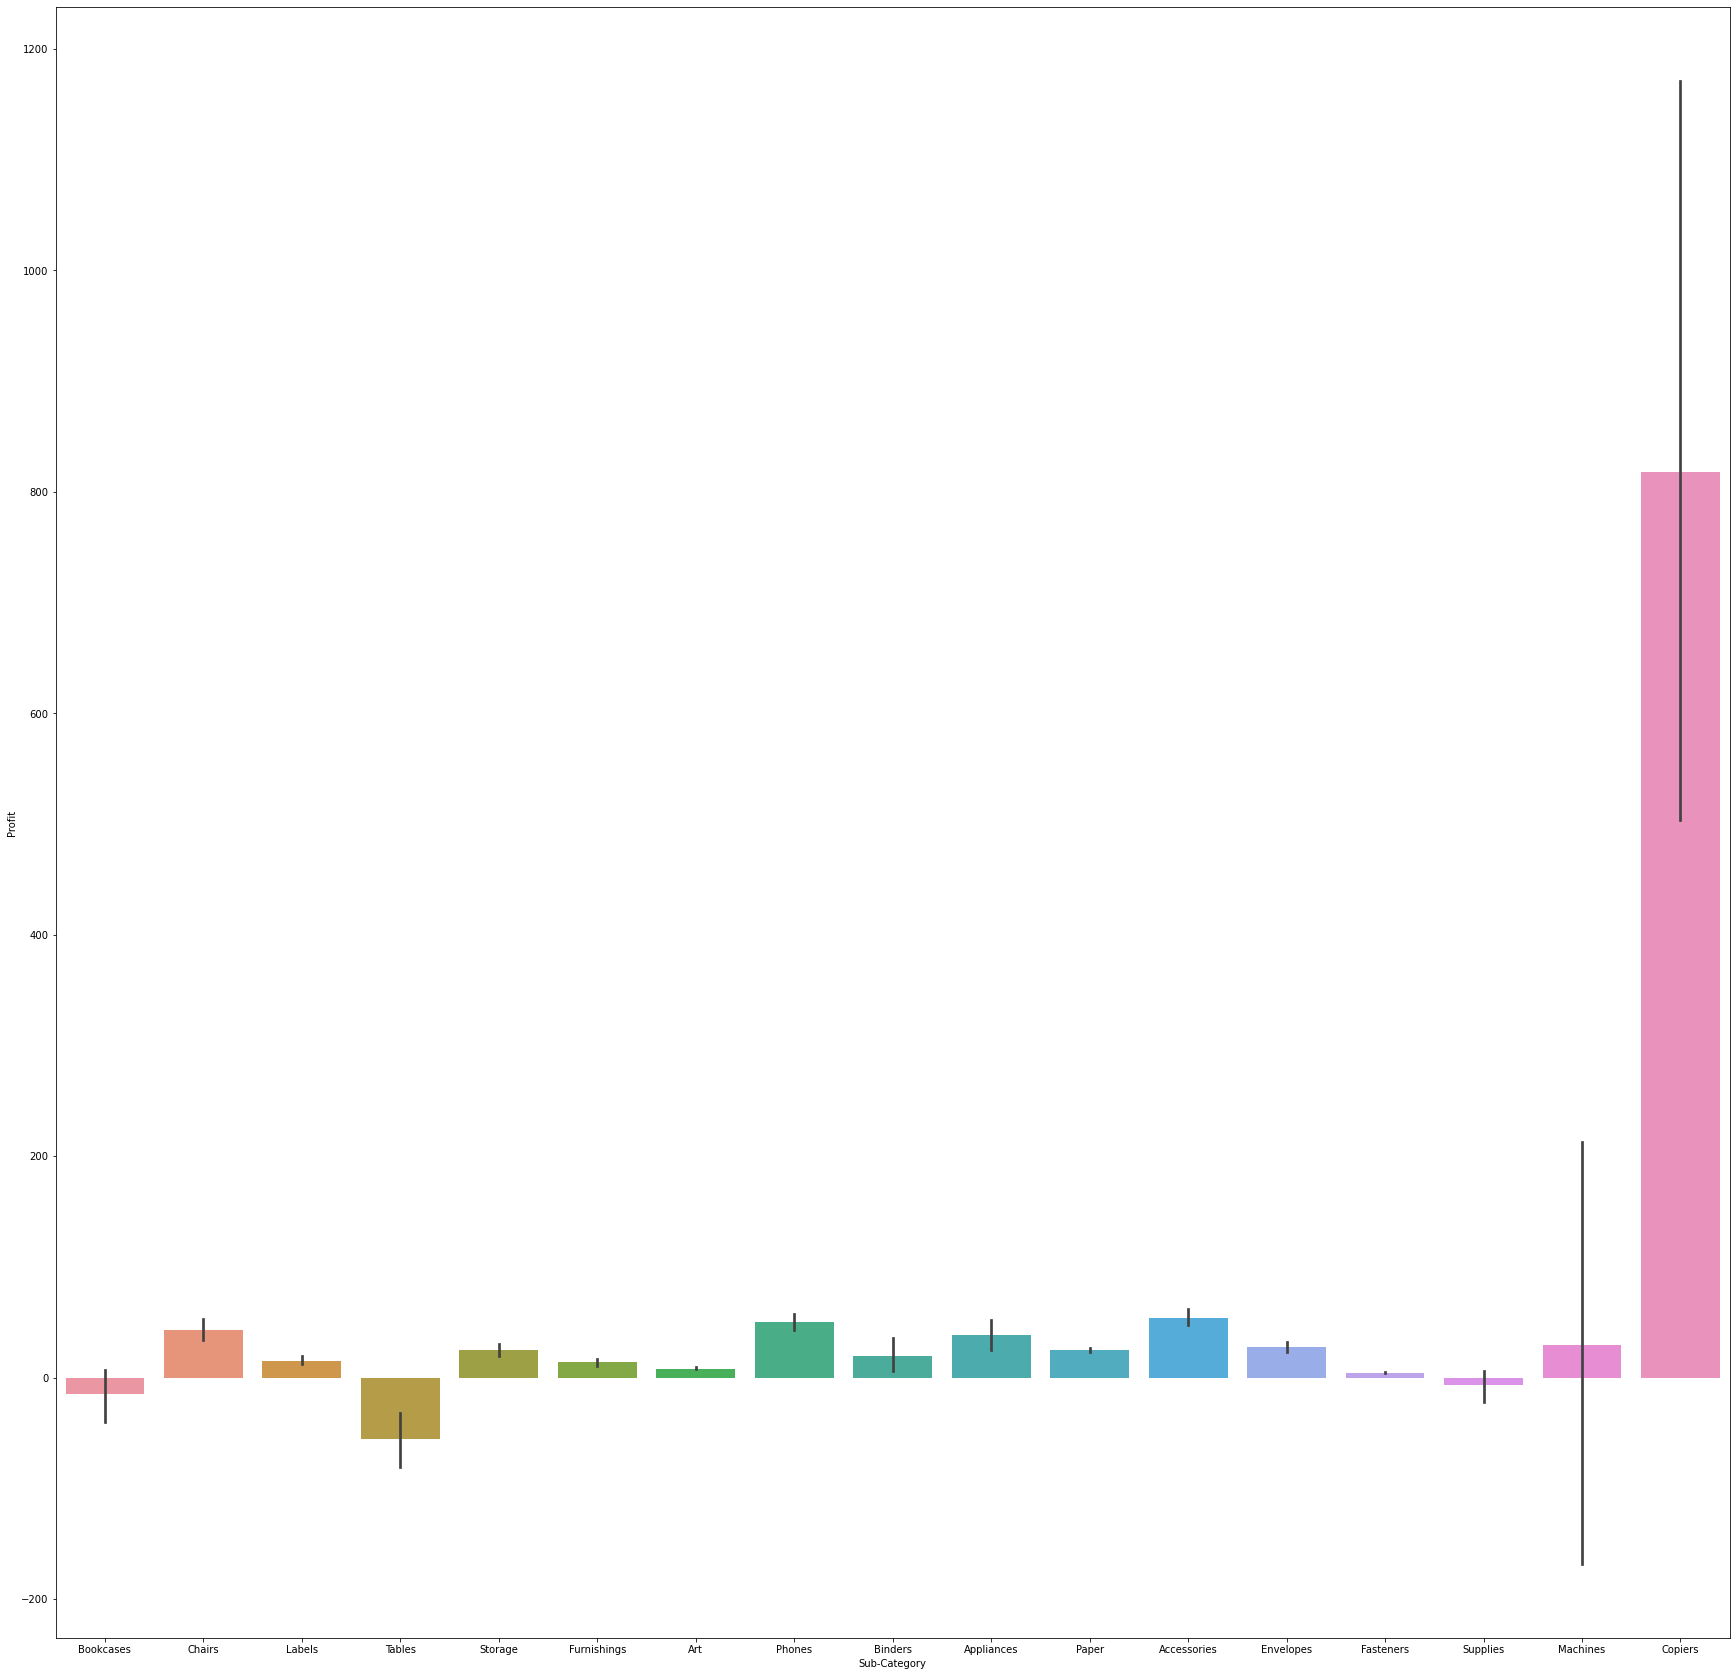

In [33]:
plt.figure(figsize=(30, 30))
sb.barplot(x="Sub-Category",y="Profit",data=df,orient="v")

[Text(0.5, 249.0, 'Category'), Text(249.0, 0.5, 'Region')]

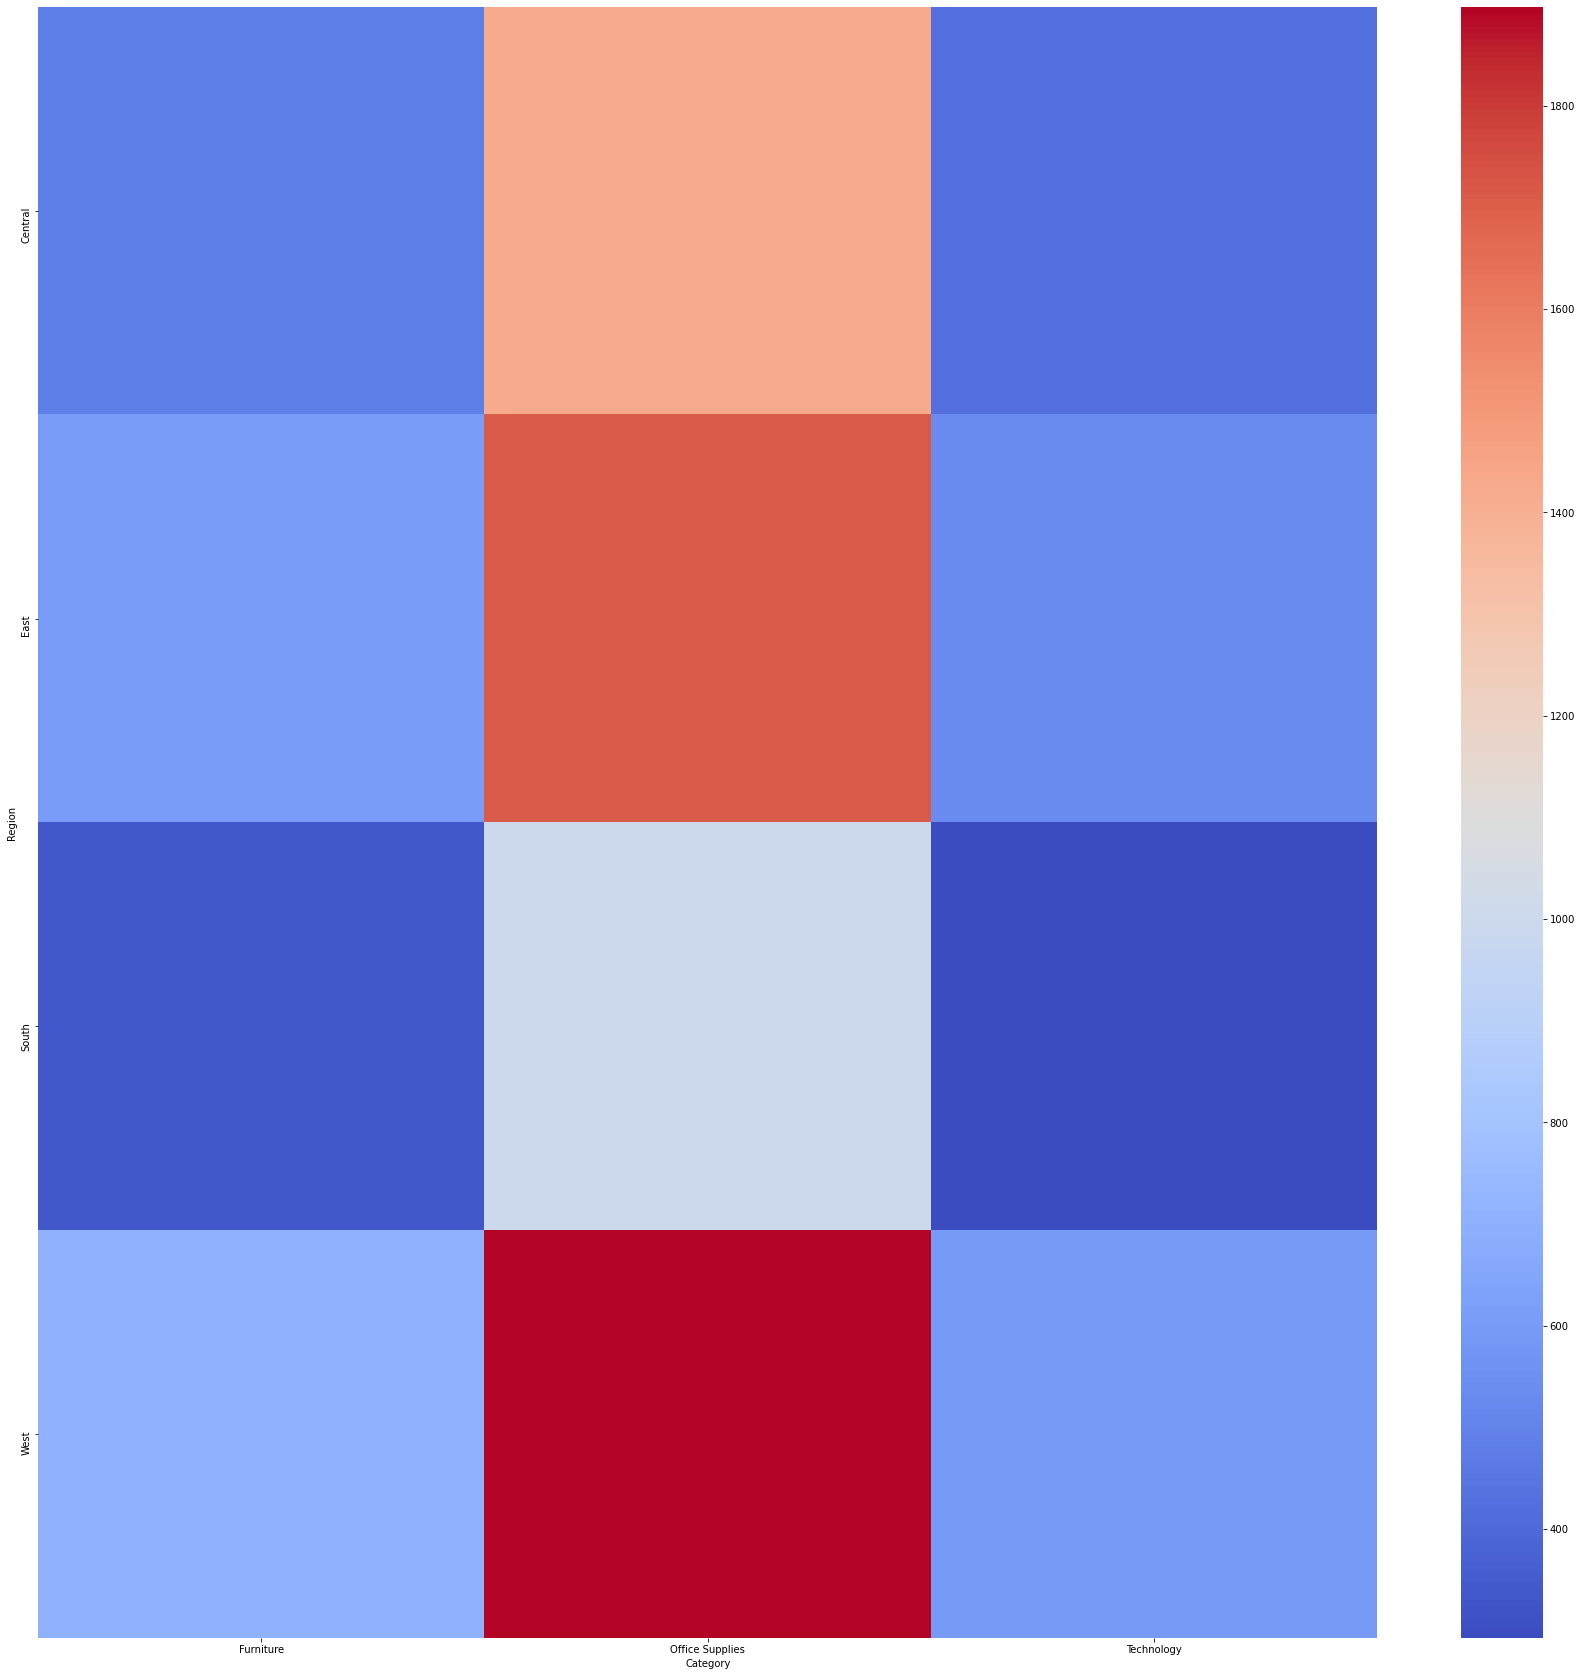

In [48]:
plt.figure(figsize=(30, 30))
df11=pd.crosstab(df['Region'],df['Category'])
sb.heatmap(df11,cmap='coolwarm',).set(xlabel="Category",ylabel="Region")


[Text(249.0, 0.5, 'Category')]

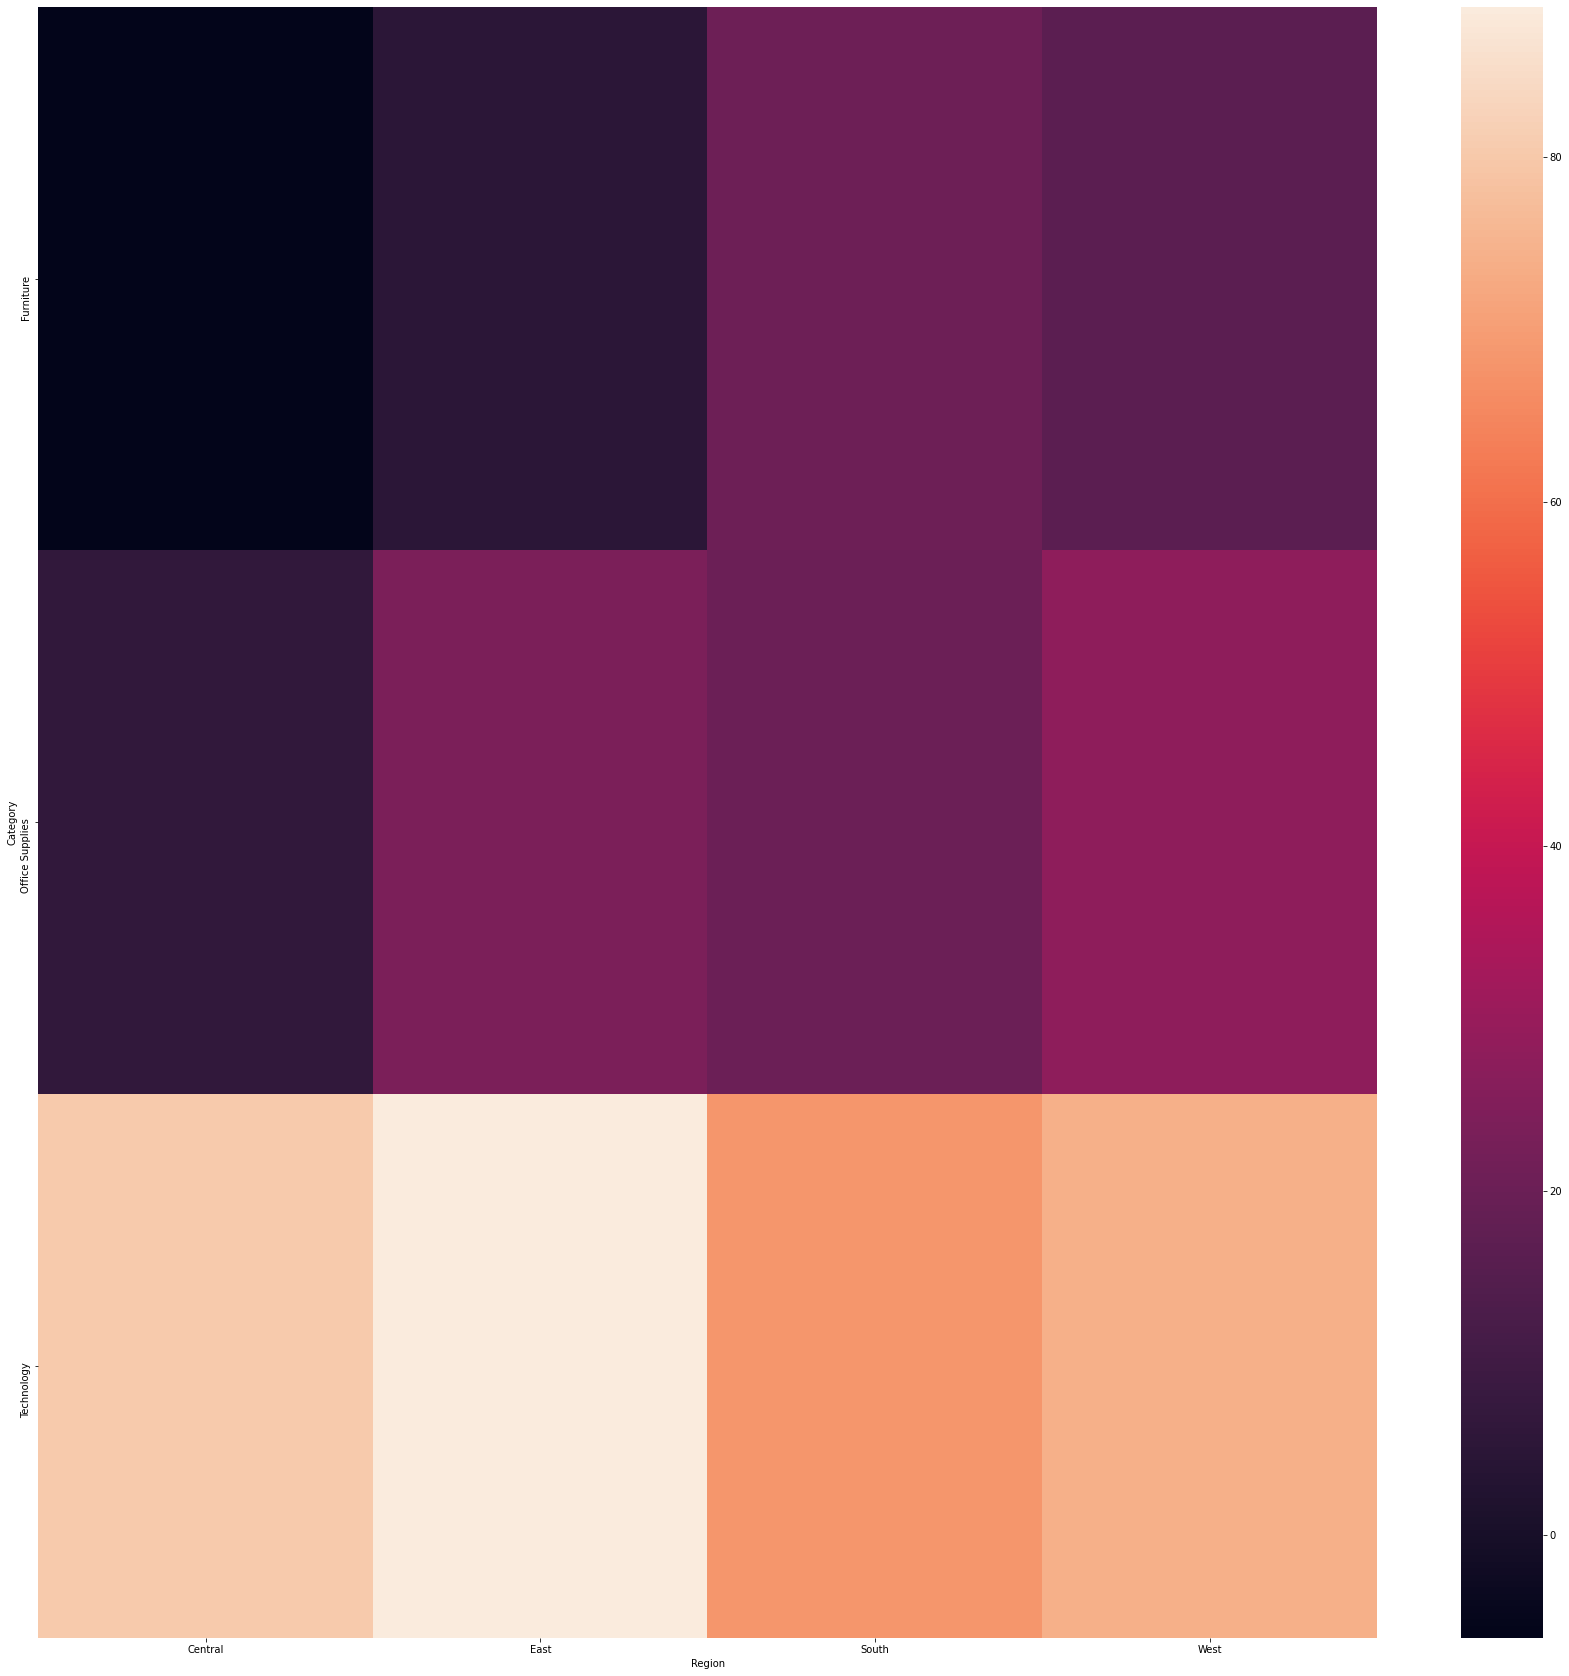

In [52]:
df4=df[["Region","Category","Profit"]]
gk = df4.groupby(['Region','Category']).mean()
plt.figure(figsize=(30, 30))
fp=gk.pivot_table(index='Category',columns='Region',values='Profit')
pp=sb.heatmap(fp)
pp.set(ylabel="Category")


[Text(32.99999999999999, 0.5, 'Category')]

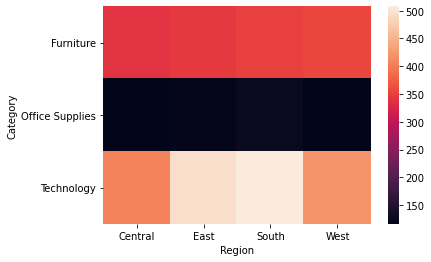

In [54]:
df5=df[["Region","Category","Sales"]]
gk1= df5.groupby(['Region','Category']).mean()

fp1=gk1.pivot_table(index='Category',columns='Region',values='Sales')
pp1=sb.heatmap(fp1)
pp1.set(ylabel="Category")
